# Importación

## Librerías

In [57]:
import sys, pandas as pd, openpyxl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, EngFormatter
import seaborn as sns
import seaborn.objects as so
import numpy as np
import statsmodels.api as sm  # Para el modelo de regresión OLS

## Parquet

In [58]:
df = pd.read_parquet('/Users/gonzalocamunez/Documents/IDE Folder/3. scraper_viviendas/git_scraper_y_análisis_viviendas/1. EDA/df_preparado.parquet')
df.columns

Index(['barrio', 'centro_periferia', 'zona', 'subzona', 'distrito',
       'id_centro_periferia', 'id_zona', 'id_subzona', 'id_distrito',
       'id_metros_cuadrados_rangos', 'precio_en_euros', 'metros_cuadrados',
       'precio_el_metro_cuadrado', 'planta', 'total_estancias',
       'num_dormitorios', 'num_aseos', 'tipo_inmueble', 'planta_rangos',
       'planta_rangos_xl', 'metros_cuadrados_rangos',
       'metros_cuadrados_rangos_xl', 'tipo_planta', 'nuevo_usado',
       'exterior_interior_chalet', 'exterior_interior', 'garaje', 'garaje_num',
       'jardin', 'jardin_num', 'piscina', 'piscina_num', 'terraza',
       'terraza_num', 'trastero', 'trastero_num', 'balcon', 'balcon_num',
       'aire_acondicionado', 'aire_acondicionado_num', 'calefaccion',
       'calefaccion_num', 'ascensor', 'ascensor_num', 'equip_servicios',
       'equip_espacios_de_ocio', 'equip_vistas', 'equip_clima',
       'precio_en_euros_rangos', 'precio_el_metro_cuadrado_rangos'],
      dtype='object')

## Subconjuntos (ALL)

In [59]:
# Outliers precio_el_metro_cuadrado
Q1_precio_el_metro_cuadrado = df['precio_el_metro_cuadrado'].quantile(0.25)
Q3_precio_el_metro_cuadrado = df['precio_el_metro_cuadrado'].quantile(0.75)
IQR_precio_el_metro_cuadrado = Q3_precio_el_metro_cuadrado - Q1_precio_el_metro_cuadrado

outliers_precio_el_metro_cuadrado = (df['precio_el_metro_cuadrado'] < Q1_precio_el_metro_cuadrado - 2*IQR_precio_el_metro_cuadrado) | (df['precio_el_metro_cuadrado'] > Q3_precio_el_metro_cuadrado + 2*IQR_precio_el_metro_cuadrado)
filas_outliers_precio_el_metro_cuadrado = df[outliers_precio_el_metro_cuadrado].index
df_outliers_precio_el_metro_cuadrado = df.loc[filas_outliers_precio_el_metro_cuadrado]
df_outliers_precio_el_metro_cuadrado = df_outliers_precio_el_metro_cuadrado.sort_values(by='precio_el_metro_cuadrado', ascending=True)

df_sin_outliers_precio_el_metro_cuadrado = df.drop(df_outliers_precio_el_metro_cuadrado.index)

# Outliers metros_cuadrados (df)
Q1_metros_cuadrados = df['metros_cuadrados'].quantile(0.25)
Q3_metros_cuadrados = df['metros_cuadrados'].quantile(0.75)
IQR_metros_cuadrados = Q3_metros_cuadrados - Q1_metros_cuadrados

outliers_metros_cuadrados = (df['metros_cuadrados'] < Q1_metros_cuadrados - 2*IQR_metros_cuadrados) | (df['metros_cuadrados'] > Q3_metros_cuadrados + 2*IQR_metros_cuadrados)
filas_outliers_metros_cuadrados = df[outliers_metros_cuadrados].index
df_outliers_metros_cuadrados = df.loc[filas_outliers_metros_cuadrados]
df_outliers_metros_cuadrados =df_outliers_metros_cuadrados.sort_values(by='metros_cuadrados', ascending=True)

df_sin_outliers_metros_cuadrados = df.drop(df_outliers_metros_cuadrados.index)

# Outliers metros_cuadrados (df_pisos)
df_pisos = df[df['tipo_inmueble'] == 'piso']
Q1_metros_cuadrados = df_pisos['metros_cuadrados'].quantile(0.25)
Q3_metros_cuadrados = df_pisos['metros_cuadrados'].quantile(0.75)
IQR_metros_cuadrados = Q3_metros_cuadrados - Q1_metros_cuadrados

outliers_pisos_metros_cuadrados = (df_pisos['metros_cuadrados'] < Q1_metros_cuadrados - 3*IQR_metros_cuadrados) | (df_pisos['metros_cuadrados'] > Q3_metros_cuadrados + 3*IQR_metros_cuadrados)
filas_pisos_outliers_metros_cuadrados = df_pisos[outliers_pisos_metros_cuadrados].index
df_pisos_outliers_metros_cuadrados = df_pisos.loc[filas_pisos_outliers_metros_cuadrados]
df_pisos_outliers_metros_cuadrados =df_pisos_outliers_metros_cuadrados.sort_values(by='metros_cuadrados', ascending=True)
num_outliers = outliers_pisos_metros_cuadrados.sum()

df_pisos_sin_outliers_metros_cuadrados = df_pisos.drop(df_pisos_outliers_metros_cuadrados.index)

# Outliers total_estancias
Q1_total_estancias = df['total_estancias'].quantile(0.25)
Q3_total_estancias = df['total_estancias'].quantile(0.75)
IQR_total_estancias = Q3_total_estancias - Q1_total_estancias

outliers_total_estancias = (df['total_estancias'] < Q1_total_estancias - 2*IQR_total_estancias) | (df['total_estancias'] > Q3_total_estancias + 2*IQR_total_estancias)
filas_outliers_total_estancias = df[outliers_total_estancias].index
df_outliers_total_estancias = df.loc[filas_outliers_total_estancias]
df_outliers_total_estancias =df_outliers_total_estancias.sort_values(by='total_estancias', ascending=True)

df_sin_outliers_total_estancias = df.drop(df_outliers_total_estancias.index)

### Columnas por categoría de datos
location_cols = ['barrio', 'centro_periferia', 'zona', 'subzona', 'distrito']
id_cols = ['id_centro_periferia', 'id_zona', 'id_distrito', 'id_metros_cuadrados_rangos']
price_sqm_cols = ['precio_en_euros', 'metros_cuadrados', 'precio_el_metro_cuadrado']
planta_y_estancias_cols = ['planta', 'total_estancias', 'num_dormitorios', 'num_aseos']
categ_cols = ['tipo_inmueble', 'planta_rangos', 'planta_rangos_xl', 'metros_cuadrados_rangos', 'metros_cuadrados_rangos_xl', 'precio_en_euros_rangos', 'precio_el_metro_cuadrado_rangos', 'tipo_planta', 'nuevo_usado', 'exterior_interior_chalet', 'exterior_interior']
equip_cols = ['garaje', 'jardin', 'piscina', 'terraza', 'trastero', 'balcon', 'aire_acondicionado', 'calefaccion', 'ascensor']
equip_cols_num = ['garaje_num', 'jardin_num', 'piscina_num', 'terraza_num', 'trastero_num', 'balcon_num', 'aire_acondicionado_num', 'calefaccion_num', 'ascensor_num']
equip_cols_agg = ['equip_servicios', 'equip_espacios_de_ocio', 'equip_vistas', 'equip_clima']

ascensor_col = ["ascensor"]
servicios_cols = ["garaje", "trastero"]
espacios_de_ocio_cols = ['jardin', 'piscina']
vistas_cols = ['balcon', 'terraza']
clima_cols = ['aire_acondicionado', 'calefaccion']

data_cols = location_cols + price_sqm_cols + planta_y_estancias_cols + categ_cols + equip_cols

### Columnas por 'zona' y 'subzona'
zonas = (df.sort_values('id_zona')['zona'].drop_duplicates().to_numpy()).tolist()  # único y ordenado por id_zona
subzonas = (df.sort_values('id_subzona')['subzona'].drop_duplicates().to_numpy()).tolist()  # único y ordenado por id_zona

## Ordenaciones

planta_rangos_orden = df['planta_rangos'].value_counts().index
tipo_inmueble_orden = df['tipo_inmueble'].value_counts().index
centro_periferia_orden = df['centro_periferia'].value_counts().index
zonas_orden = list(df['zona'].value_counts().index)
subzonas_centro_orden = ['centro-medio','centro-centro','centro-norte','centro-sur']
subzonas_periferia_orden = ['sur', 'este', 'oeste', 'norte']
subzonas_orden = ['centro-medio','centro-centro','centro-sur','centro-norte','norte', 'oeste', 'este', 'sur']
subzonas_orden_pal = ['centro-norte','centro-medio','centro-centro','centro-sur','norte', 'oeste', 'este', 'sur']
subzonas_orden_count = ['centro-medio', 'centro-centro', 'sur', 'este', 'oeste', 'centro-norte','norte', 'centro-sur']
zonas_orden_count = ['sur', 'este', 'norte','oeste']
planta_rangos_orden = ['-1 Semi-sótano', '0 (Bajo)', '0 (Chalet)', '1º', '2º', '3º', '4º', '5º', '6º o 7º', '8º o más']
planta_rangos_xl_orden = ['0 (Bajo o Semi-S.)', '0 (Chalet)', '1º - 3º', '4º - 5º', '6º o 7º', '8º o más']
planta_pisos_rangos_xl_orden = ['0 (Bajo o Semi-S.)', '1º - 3º', '4º - 5º', '6º o 7º', '8º o más']
metros_cuadrados_rangos_orden = ['0-35', '36-60', '61-75', '76-100', '101-120', '121-150', '151-200', '201-250', '251-300', '301-500', '501<']
metros_cuadrados_rangos_xl_orden = ['0-30' , '31-60', '61-120', '121-240', '241-500', '501<']
exterior_interior_chalet_orden = ['exterior', 'interior', 'chalet']
precio_en_euros_rangos_orden = ['10% más caro (Percentil 90)', '15% caro-intermedio','50% central (IQR)','15% barato-intermedio','10% más barato (Percentil 10)']
precio_el_metro_cuadrado_rangos_orden = ['10% pmc más alto (Percentil 90)', '15% pmc caro-intermedio', '50% pmc central (IQR)', '15% pmc barato-intermedio', '10% pmc más bajo (Percentil 10)']
nuevo_usado_orden = ['obra_nueva', 'obra_usada', 'para_reformar']
exterior_interior_orden = ['exterior', 'interior']
zonas_orden_pme = ['centro', 'norte', 'oeste', 'este', 'sur']

distritos_orden_count = df['distrito'].value_counts().index
distritos_orden = ['Tetuán', 'Chamartín', 'Chamberí', 'Barrio de Salamanca', 'Centro', 'Retiro', 'Arganzuela', 'Carabanchel', 'Usera', 'Puente de Vallecas', \
 'Villaverde', 'Villa de Vallecas', 'Ciudad Lineal', 'San Blas', 'Moratalaz', 'Vicálvaro', 'Moncloa', 'Latina', 'Fuencarral', 'Hortaleza', 'Barajas']

subzonas_por_distrito = {
    'centro-norte': ['Tetuán', 'Chamartín'],
    'centro-medio': ['Chamberí', 'Barrio de Salamanca'],
    'centro-centro': ['Centro'],
    'centro-sur': ['Retiro', 'Arganzuela'],
    'sur': ['Carabanchel', 'Usera', 'Puente de Vallecas', 'Villaverde', 'Villa de Vallecas'],
    'este': ['Ciudad Lineal', 'San Blas', 'Moratalaz', 'Vicálvaro'],
    'oeste': ['Moncloa', 'Latina', 'Fuencarral'],
    'norte': ['Hortaleza', 'Barajas']
}


## Paletas

centro_periferia_colors = {
'centro': (0.03137254901960784, 0.4126259131103421, 0.6859669357939254),
'periferia': (0.9, 0.2, 0.3)
}

subzona_colors = {
    # Del primer loop (zonas principales)
    'sur': (0.90, 0.54, 0.76),  # Inverso cromático de norte
    'este': (0.60, 0.20, 0.40), # Inverso cromático de oeste
    'oeste': (0.65, 0.84, 0.32),
    'norte': (0.12, 0.5, 0.2),
    
    # Del segundo loop (subzonas de centro)
    'centro-norte': (0, 0, 0.2),
    'centro-medio': (0.1, 0.1, 0.9),
    'centro-centro': (0.4, 0.6, 1),
    'centro-sur': (0.1, 1, 1)
    }
zona_colors = {
    # Del primer loop (zonas principales)
    'centro': (0.03137254901960784, 0.4126259131103421, 0.6859669357939254),
    'sur': (0.90, 0.54, 0.76),  # Inverso cromático de norte
    'este': (0.60, 0.20, 0.40), # Inverso cromático de oeste
    'oeste': (0.65, 0.84, 0.32),
    'norte': (0.12, 0.5, 0.2),
}

distrito_colors = {distrito: subzona_colors[subzona] for subzona, distritos in subzonas_por_distrito.items() for distrito in distritos}

precio_en_euros_rangos_colors = {
    '10% más caro (Percentil 90)': (0, 1, 0) ,
    '15% caro-intermedio': (0.1, 0.5, 0.1),
    '50% central (IQR)': (0.5, 0.5, 0.5),
    '15% barato-intermedio': (0.6, 0.2, 0.2),
    '10% más barato (Percentil 10)': (1, 0, 0)
}

precio_el_metro_cuadrado_rangos_colors = {
    '10% pmc más alto (Percentil 90)': (0, 1, 0) ,
    '15% pmc caro-intermedio': (0.1, 0.5, 0.1),
    '50% pmc central (IQR)': (0.5, 0.5, 0.5),
    '15% pmc barato-intermedio': (0.6, 0.2, 0.2),
    '10% pmc más bajo (Percentil 10)': (1, 0, 0)
}


### Paletas planta_rangos
metros_cuadrados_rangos_colors = dict(zip(metros_cuadrados_rangos_orden, sns.color_palette('winter', n_colors=len(metros_cuadrados_rangos_orden))))
metros_cuadrados_rangos_xl_colors = dict(zip(metros_cuadrados_rangos_xl_orden, sns.color_palette('winter', n_colors=len(metros_cuadrados_rangos_xl_orden))))
planta_rangos_colors = dict(zip(planta_rangos_orden, sns.color_palette('magma_r', n_colors=len(planta_rangos_orden))))
planta_rangos_xl_colors = dict(zip(planta_rangos_xl_orden, sns.color_palette('magma_r', n_colors=len(planta_rangos_xl_orden))))
tipo_inmueble_colors = {'piso': (0.2, 0.6, 1),'chalet': (1, 0.5, 0.6)}
exterior_interior_colors = dict(zip(exterior_interior_orden, sns.color_palette('Greens', n_colors=len(exterior_interior_orden))))
nuevo_usado_colors = dict(zip(nuevo_usado_orden, sns.color_palette('dark:salmon_r', n_colors=len(nuevo_usado_orden))))


### Paletas con_sin
sns.color_palette("Paired")
paleta = sns.color_palette("Paired")
mis_colores = [paleta[3], paleta[2], paleta[4], paleta[5]]
con_sin_colors = {
    'concon': (0.1, 0.5, 0.1),
    'consin': (0.1, 0.7, 0.1),
    'sincon': (0.2, 0.9, 0.2),
    'sinsin': (0.9, 0.1, 0.1)
}
con_sin_colors_list = [
    con_sin_colors['concon'],
    con_sin_colors['consin'],
    con_sin_colors['sincon'],
    con_sin_colors['sinsin']
]
ascensor_orden = ['con ascensor', 'sin ascensor']
equip_servicios_orden = ['con garaje, con trastero','con garaje, sin trastero', 'sin garaje, con trastero', 'sin garaje, sin trastero']
equip_espacios_de_ocio_orden = ['con jardín, con piscina','con jardín, sin piscina', 'sin jardín, con piscina','sin jardín, sin piscina']
equip_vistas_orden = ['con balcon, con terraza', 'con balcon, sin terraza', 'sin balcon, con terraza', 'sin balcon, sin terraza']
equip_clima_orden = ['con aire acond., con calefacción','con aire acond., sin calefacción', 'sin aire acond., con calefacción','sin aire acond., sin calefacción']

orden_colors = [con_sin_colors_list[0], con_sin_colors_list[1], con_sin_colors_list[2], con_sin_colors_list[3]]
ascensor_colors = [con_sin_colors_list[0], con_sin_colors_list[3]]
equip_servicios_colors = orden_colors
equip_espacios_de_ocio_colors = orden_colors
equip_vistas_colors = orden_colors
equip_clima_colors = orden_colors


## DataFrames por filas

### Sub DataFrames por `zona` y `subzona`
df_centro = df[df['centro_periferia'] == 'centro']
df_periferia = df[df['centro_periferia'] == 'periferia']
df_zcentro = df[df['zona'] == 'centro']
df_zsur = df[df['zona'] == 'sur']
df_zeste = df[df['zona'] == 'este']
df_zoeste = df[df['zona'] == 'oeste']
df_znorte = df[df['zona'] == 'norte']

### Sub DataFrames por `tipo_inmueble`:
df_chalets = df[df['tipo_inmueble'] == 'chalet']
df_pisos = df[df['tipo_inmueble'] == 'piso']

# Pisos más baratos (en precio absoluto)
P10_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.10)
P20_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.20)
# Pisos más caros (en precio absoluto)
P80_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.80)
P90_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.90)

# IQR_pisos_precio_en_euros = Pisos ni caros ni baratos (en precio absoluto)
Q1_pisos_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.25)
Q3_pisos_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.75)
IQR_pisos_precio_en_euros = Q3_pisos_precio_en_euros - Q1_pisos_precio_en_euros

# df_pisos ni caros ni baratos (50% central)
df_pisos_IQR_precio_en_euros = df_pisos[    (df_pisos['precio_en_euros'] >= Q1_pisos_precio_en_euros - 2*IQR_pisos_precio_en_euros) &
    (df_pisos['precio_en_euros'] <= Q3_pisos_precio_en_euros + 2*IQR_pisos_precio_en_euros)]

# df_pisos baratos
df_pisos_P10_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] < P10_precio_en_euros]
df_pisos_P20_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] < P20_precio_en_euros]
# df_pisos caros
df_pisos_P80_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] > P80_precio_en_euros]
df_pisos_P90_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] > P90_precio_en_euros]

## DataFrames por columnas

### Sub DataFrames de `precios`
df_precios = df[price_sqm_cols]
df_precios_centro = df[price_sqm_cols + ['centro_periferia']]
df_precios_zonas = df[price_sqm_cols + ['zona', 'subzona']]
df_precios_numeric = df[price_sqm_cols + planta_y_estancias_cols]
df_precios_categ = df[price_sqm_cols + categ_cols]
df_precios_equip = df[price_sqm_cols + equip_cols]


### Groupby DataFrames

### `price_sqm_cols` por `zona`
df_gb_precio_y_sqm_por_zonas = df.groupby('zona')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_subzonas = df.groupby('subzona')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_tipo_inmueble = df.groupby('tipo_inmueble')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_planta_rangos = df.groupby('planta_rangos')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_nuevo_usado = df.groupby('nuevo_usado')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_exterior_interior_chalet = df.groupby('exterior_interior_chalet')[price_sqm_cols].agg(['mean', 'std', 'count'])
### `price_sqm_cols` por `categ_cols
df_gb_precio_y_sqm_por_garaje = df.groupby('garaje_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por garaje
df_gb_precio_y_sqm_por_jardin = df.groupby('jardin_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por jardin
df_gb_precio_y_sqm_por_piscina = df.groupby('piscina_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por piscina
df_gb_precio_y_sqm_por_terrazas = df.groupby('terraza_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por terraza
df_gb_precio_y_sqm_por_trasteros = df.groupby('trastero_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por trastero
df_gb_precio_y_sqm_por_balcon = df.groupby('balcon_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por balcon
df_gb_precio_y_sqm_por_aire_acondicionado = df.groupby('aire_acondicionado_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por aire_acondicionado
df_gb_precio_y_sqm_por_calefaccion = df.groupby('calefaccion_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por calefaccion
df_gb_precio_y_sqm_por_ascensor = df.groupby('ascensor_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por ascensor

### `planta_y_estancias_cols` por `zona`
df_gb_planta_y_estancias_por_zonas= df.groupby('zona')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_subzonas = df.groupby('subzona')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_tipo_inmueble = df.groupby('tipo_inmueble')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_planta_rangos = df.groupby('planta_rangos')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_nuevo_usado = df.groupby('nuevo_usado')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_exterior_interior_chalet = df.groupby('exterior_interior_chalet')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
### `planta_y_estancias_cols` por categ_cols
df_gb_planta_y_estancias_por_garaje = df.groupby('garaje_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por garaje
df_gb_planta_y_estancias_por_jardin = df.groupby('jardin_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por jardin
df_gb_planta_y_estancias_por_piscina = df.groupby('piscina_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por piscina
df_gb_planta_y_estancias_por_terrazas = df.groupby('terraza_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por terraza
df_gb_planta_y_estancias_por_trasteros = df.groupby('trastero_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por trastero
df_gb_planta_y_estancias_por_balcon = df.groupby('balcon_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por balcon
df_gb_planta_y_estancias_por_aire_acondicionado = df.groupby('aire_acondicionado_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por aire_acondicionado
df_gb_planta_y_estancias_por_calefaccion = df.groupby('calefaccion_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por calefaccion
df_gb_planta_y_estancias_por_ascensor = df.groupby('ascensor_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por ascensor

### `equip_cols_agg` por `precio_en_euros`

## Percentiles para rangos en df total
p20_precio_en_euros = df['precio_en_euros'].quantile(0.25)
p10_precio_en_euros = df['precio_en_euros'].quantile(0.10)
p25_precio_en_euros = df['precio_en_euros'].quantile(0.25)
p75_precio_en_euros = df['precio_en_euros'].quantile(0.75)
p90_precio_en_euros = df['precio_en_euros'].quantile(0.90)
p80_precio_en_euros = df['precio_en_euros'].quantile(0.80)

## Percentiles para rangos df_pisos
p20_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.25)
p10_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.10)
p25_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.25)
p75_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.75)
p90_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.90)
p80_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.80)

## Crear columna de variable
df['precio_en_euros_rangos'] = None
df.loc[df['precio_en_euros'] <= p10_precio_en_euros, 'precio_en_euros_rangos'] = '10% más barato (Percentil 10)'
df.loc[(df['precio_en_euros'] > p10_precio_en_euros) & (df['precio_en_euros'] <= p25_precio_en_euros), 'precio_en_euros_rangos'] = '15% barato-intermedio'
df.loc[(df['precio_en_euros'] > p25_precio_en_euros) & (df['precio_en_euros'] < p75_precio_en_euros), 'precio_en_euros_rangos'] = '50% central (IQR)'
df.loc[(df['precio_en_euros'] >= p75_precio_en_euros) & (df['precio_en_euros'] < p90_precio_en_euros), 'precio_en_euros_rangos'] = '15% caro-intermedio'
df.loc[df['precio_en_euros'] >= p90_precio_en_euros, 'precio_en_euros_rangos'] = '10% más caro (Percentil 90)'

## Crear dfs de distribución de `precio_en_euros_rangos` para total viviendas
df_P10 = df[df['precio_en_euros'] < p10_precio_en_euros]
df_P20 = df[df['precio_en_euros'] < p20_precio_en_euros]
df_P25 = df[df['precio_en_euros'] < p25_precio_en_euros]
df_P10_P25 = df[(df['precio_en_euros'] >= p10_precio_en_euros) & (df['precio_en_euros'] < p25_precio_en_euros)]
df_IQR = df[(df['precio_en_euros'] >= p25_precio_en_euros) & (df['precio_en_euros'] < p75_precio_en_euros)]  # P25_P75
df_P75_P90 = df[(df['precio_en_euros'] >= p75_precio_en_euros) & (df['precio_en_euros'] < p90_precio_en_euros)]
df_P90 = df[df['precio_en_euros'] >= p90_precio_en_euros]
df_P75 = df[df['precio_en_euros'] < p75_precio_en_euros]
df_P80 = df[df['precio_en_euros'] < p80_precio_en_euros]

## Crear dfs de distribución de `precio_en_euros_rangos` para pisos
df_pisos_P10 = df_pisos[df_pisos['precio_en_euros'] < p10_precio_en_euros_pisos]
df_pisos_P20 = df_pisos[df_pisos['precio_en_euros'] < p20_precio_en_euros_pisos]
df_pisos_P25 = df_pisos[df_pisos['precio_en_euros'] < p25_precio_en_euros_pisos]
df_pisos_P10_P25 = df_pisos[(df_pisos['precio_en_euros'] >= p10_precio_en_euros_pisos) & (df_pisos['precio_en_euros'] < p25_precio_en_euros_pisos)]
df_pisos_IQR = df_pisos[(df_pisos['precio_en_euros'] >= p25_precio_en_euros_pisos) & (df_pisos['precio_en_euros'] < p75_precio_en_euros_pisos)]  # P25_P75
df_pisos_P75_P90 = df_pisos[(df_pisos['precio_en_euros'] >= p75_precio_en_euros_pisos) & (df_pisos['precio_en_euros'] < p90_precio_en_euros_pisos)]
df_pisos_P90 = df_pisos[df_pisos['precio_en_euros'] >= p90_precio_en_euros_pisos]
df_pisos_P75 = df_pisos[df_pisos['precio_en_euros'] < p75_precio_en_euros_pisos]
df_pisos_P80 = df_pisos[df_pisos['precio_en_euros'] < p80_precio_en_euros_pisos]

# IQR_pee
df_IQR_pee_gb_ascensor = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('ascensor').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'ascensor': 'count'})
df_IQR_pee_gb_equip_servicios = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_servicios').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_servicios': 'count'})
df_IQR_pee_gb_equip_espacios_de_ocio = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_espacios_de_ocio').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_espacios_de_ocio': 'count'})
df_IQR_pee_gb_equip_vistas = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_vistas').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_vistas': 'count'})
df_IQR_pee_gb_equip_clima = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_clima').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_clima': 'count'})

# P10_pee
df_P10_pee_gb_ascensor = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('ascensor').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'ascensor': 'count'})
df_P10_pee_gb_equip_servicios = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_servicios').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_servicios': 'count'})
df_P10_pee_gb_equip_espacios_de_ocio = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_espacios_de_ocio').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_espacios_de_ocio': 'count'})
df_P10_pee_gb_equip_vistas = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_vistas').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_vistas': 'count'})
df_P10_pee_gb_equip_clima = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_clima').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_clima': 'count'})

# P90_pee
df_P90_pee_gb_ascensor = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('ascensor').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'ascensor': 'count'})
df_P90_pee_gb_equip_servicios = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_servicios').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_servicios': 'count'})
df_P90_pee_gb_equip_espacios_de_ocio = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_espacios_de_ocio').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_espacios_de_ocio': 'count'})
df_P90_pee_gb_equip_vistas = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_vistas').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_vistas': 'count'})
df_P90_pee_gb_equip_clima = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_clima').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_clima': 'count'})


# Outliers precio_en_euros
Q1_precio_en_euros = df['precio_en_euros'].quantile(0.25)
Q3_precio_en_euros = df['precio_en_euros'].quantile(0.75)
IQR_precio_en_euros = Q3_precio_en_euros - Q1_precio_en_euros

outliers_precio_en_euros = (df['precio_en_euros'] < Q1_precio_en_euros - 2*IQR_precio_en_euros) | (df['precio_en_euros'] > Q3_precio_en_euros + 2*IQR_precio_en_euros)
filas_outliers_precio_en_euros = df[outliers_precio_en_euros].index
df_outliers_precio_en_euros = df.loc[filas_outliers_precio_en_euros]
df_outliers_precio_en_euros = df_outliers_precio_en_euros.sort_values(by='precio_en_euros', ascending=False)

df_sin_outliers_precio_en_euros = df.drop(df_outliers_precio_en_euros.index)

## DataFrames Crosstab

### `zona`-`exterior_interior`
#### CONTEOS TOTALES `zona`
df_cross_zona_ext_int_cont = pd.crosstab(    df['zona'],     df['exterior_interior'] )
df_cross_zona_ext_int_cont['total'] = df_cross_zona_ext_int_cont.sum(axis=1)
df_cross_zona_ext_int_cont.loc['Total'] = df_cross_zona_ext_int_cont.sum(axis=0)
#### CONTEOS TOTALES `subzona`
df_cross_subzona_ext_int_cont = pd.crosstab(    df['subzona'],     df['exterior_interior'] )
df_cross_subzona_ext_int_cont['total'] = df_cross_subzona_ext_int_cont.sum(axis=1)
df_cross_subzona_ext_int_cont.loc['Total'] = df_cross_subzona_ext_int_cont.sum(axis=0)
#### % por COLUMNA (cada categoría suma 100%)
df_cross_zona_ext_int_col = pd.crosstab(    df['subzona'],     df['exterior_interior'],    normalize='columns')
df_cross_zona_ext_int_col.loc['Total'] = df_cross_zona_ext_int_col.sum(axis=0)
#### % por FILA (cada zona suma 100%)
df_cross_zona_ext_int_ind = pd.crosstab(    df['zona'],     df['exterior_interior'],    normalize='index')
df_cross_zona_ext_int_ind['total'] = df_cross_zona_ext_int_ind.sum(axis=1)

### `zona`-`planta_rangos`
#### CONTEOS TOTALES `subzona`
df_cross_zona_planta_rangos_cont = pd.crosstab(    df['zona'],     df['planta_rangos'] )
df_cross_zona_planta_rangos_cont['total'] = df_cross_zona_planta_rangos_cont.sum(axis=1)
df_cross_zona_planta_rangos_cont.loc['Total'] = df_cross_zona_planta_rangos_cont.sum(axis=0)
#### % por COLUMNA (cada categoría suma 100%)
df_cross_zona_planta_rangos_col = pd.crosstab(    df['zona'],     df['planta_rangos'],    normalize='columns')
df_cross_zona_planta_rangos_col.loc['Total'] = df_cross_zona_planta_rangos_col.sum(axis=0)
#### % por FILA (cada zona suma 100%)
df_cross_zona_planta_rangos_ind = pd.crosstab(    df['zona'],     df['planta_rangos'],    normalize='index')
df_cross_zona_planta_rangos_ind['total'] = df_cross_zona_planta_rangos_ind.sum(axis=1)
 
### `zona`-`metros_cuadrados_rangos`
#### CONTEOS TOTALES `subzona`
df_cross_zona_metros_cuadrados_rangos_cont = pd.crosstab(    df['zona'],     df['metros_cuadrados_rangos'])
df_cross_zona_metros_cuadrados_rangos_cont['total'] = df_cross_zona_metros_cuadrados_rangos_cont.sum(axis=1)
df_cross_zona_metros_cuadrados_rangos_cont.loc['Total'] = df_cross_zona_metros_cuadrados_rangos_cont.sum(axis=0)
#### % por COLUMNA (cada categoría suma 100%)
df_cross_zona_metros_cuadrados_rangos_col = pd.crosstab(    df['zona'],     df['metros_cuadrados_rangos'],    normalize='columns')
df_cross_zona_metros_cuadrados_rangos_col.loc['Total'] = df_cross_zona_metros_cuadrados_rangos_col.sum(axis=0)
#### % por FILA (cada zona suma 100%)
df_cross_zona_metros_cuadrados_rangos_ind = pd.crosstab(    df['zona'],     df['metros_cuadrados_rangos'],    normalize='index')
df_cross_zona_metros_cuadrados_rangos_ind['total'] = df_cross_zona_metros_cuadrados_rangos_ind.sum(axis=1)


# 1. Objetivos (`viviendas`)

# 2. Variables

# 3. Viviendas

## LOCALIZACIÓN

- Columnas = `location_cols`
- Variables = `centro_periferia`, `zona`, `subzona` y `distrito`

### `centro_periferia`, `zona`, `subzona`

subzona
centro-medio     165
centro-centro    101
sur               72
este              69
oeste             56
centro-norte      53
norte             48
centro-sur        46
Name: count, dtype: Int64

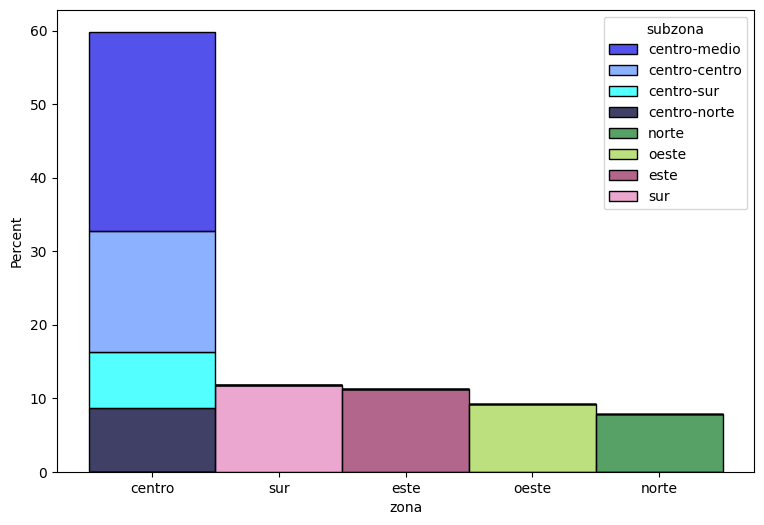

In [125]:
df_plot = df.copy()
orden_frecuencia = df_plot['zona'].value_counts().index.tolist()
df_plot['zona'] = df_plot['zona'].astype('category').cat.reorder_categories(orden_frecuencia)
plt.figure(figsize=(9, 6))
sns.histplot(data=df_plot, x="zona", hue='subzona', hue_order=subzonas_orden, stat='percent', palette=subzona_colors, multiple='stack')

df['subzona'].value_counts()

### `distrito`

Los distritos tienen bases de análisis muy pequeñas no segmentables y por tanto no es conveniente realizar el análisis a nivel `distrito`.

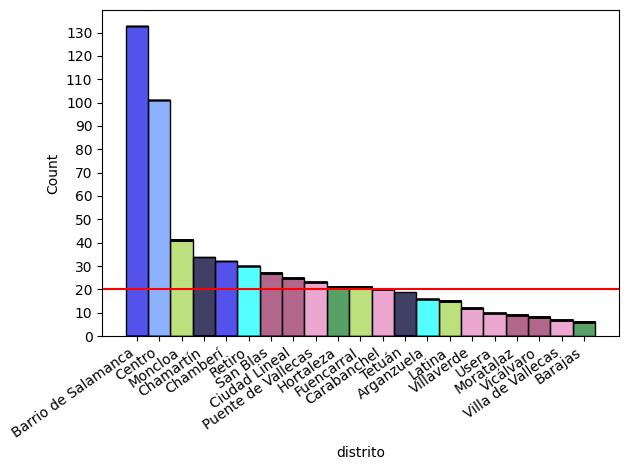

<Figure size 900x600 with 0 Axes>

distrito
Barrio de Salamanca    133
Centro                 101
Moncloa                 41
Chamartín               34
Chamberí                32
Retiro                  30
San Blas                27
Ciudad Lineal           25
Puente de Vallecas      23
Hortaleza               21
Fuencarral              21
Carabanchel             20
Tetuán                  19
Arganzuela              16
Latina                  15
Villaverde              12
Usera                   10
Moratalaz                9
Vicálvaro                8
Villa de Vallecas        7
Barajas                  6
Name: count, dtype: Int64

In [126]:
df_plot = df.copy()
df_plot['distrito'] = pd.Categorical(df_plot['distrito'], categories=distritos_orden_count, ordered=True)

sns.histplot(data=df_plot, x="distrito", hue='distrito', hue_order=distritos_orden, palette=distrito_colors, multiple='stack', legend=False)
plt.gca().yaxis.set_major_locator(MultipleLocator(10))
plt.axhline(y=20, color='red')
plt.setp(plt.gca().get_xticklabels(), rotation=35, ha='right')
plt.tight_layout()
plt.figure(figsize=(9, 6))
plt.show()
df['distrito'].value_counts()

## CARACTERÍSTICAS

- Columnas = `categ_cols` + [`planta`, `planta_rangos`]
- Variables = `tipo_inmueble`, `tipo_planta`, `nuevo_usado`, `exterior_interior_chalet`, `exterior_interior`, `planta`, `planta_rangos`

### * `tipo_inmueble`

tipo_inmueble
piso      566
chalet     44
Name: count, dtype: Int64

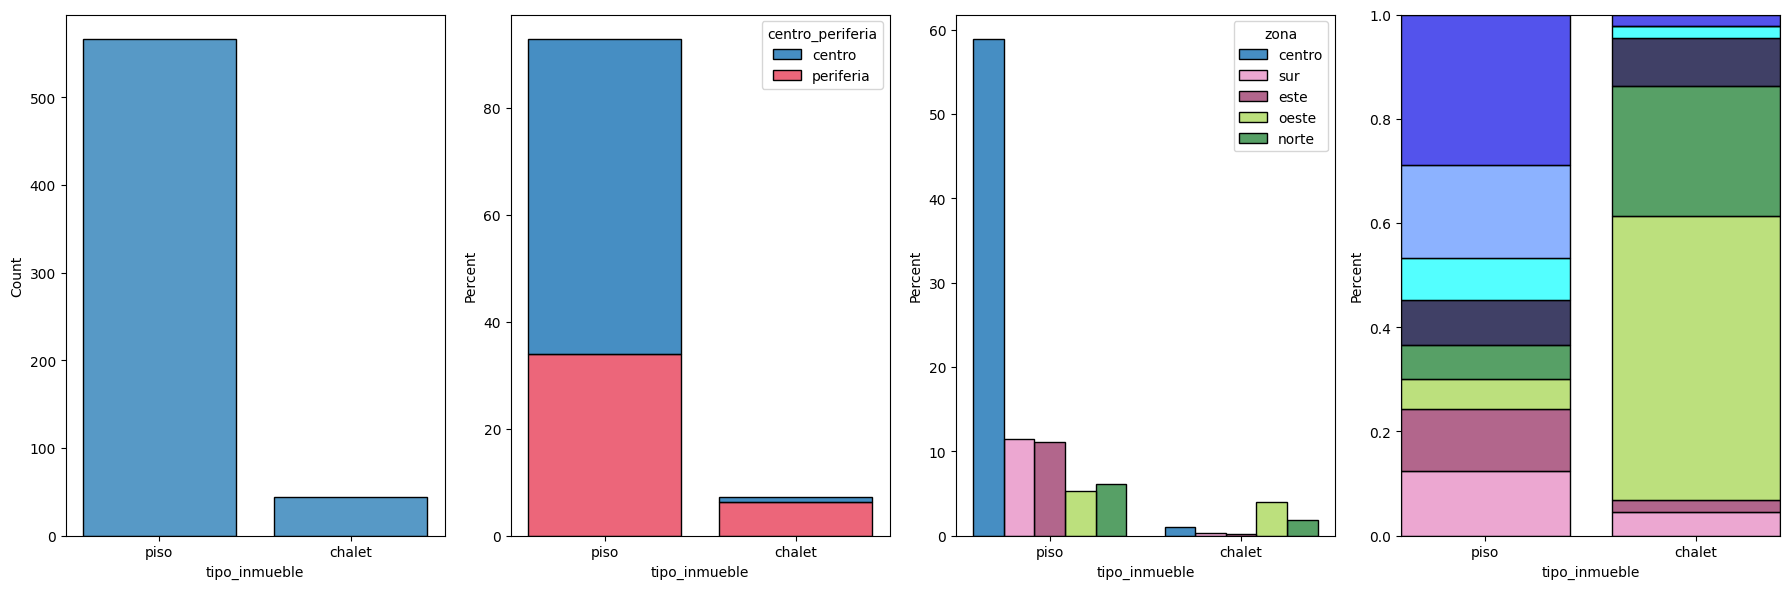

In [124]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6))
sns.histplot(data=df,ax=ax1, x="tipo_inmueble", shrink=0.8, multiple="stack", bins=1)
sns.histplot(data=df,ax=ax2, x="tipo_inmueble", shrink=0.8, hue="centro_periferia", hue_order=centro_periferia_orden, multiple="stack", stat='percent', palette=centro_periferia_colors, bins=1)
sns.histplot(data=df,ax=ax3, x="tipo_inmueble", hue='zona', hue_order=zonas_orden, palette=zona_colors, multiple='dodge', stat='percent', shrink=0.8)
sns.histplot(data=df,ax=ax4, x="tipo_inmueble", shrink=0.8, hue="subzona", hue_order=subzonas_orden, multiple="fill", stat='percent', palette=subzona_colors, bins=1, legend=False)
plt.tight_layout()
df['tipo_inmueble'].value_counts()

### * `planta`, `planta_rangos(_xl)`

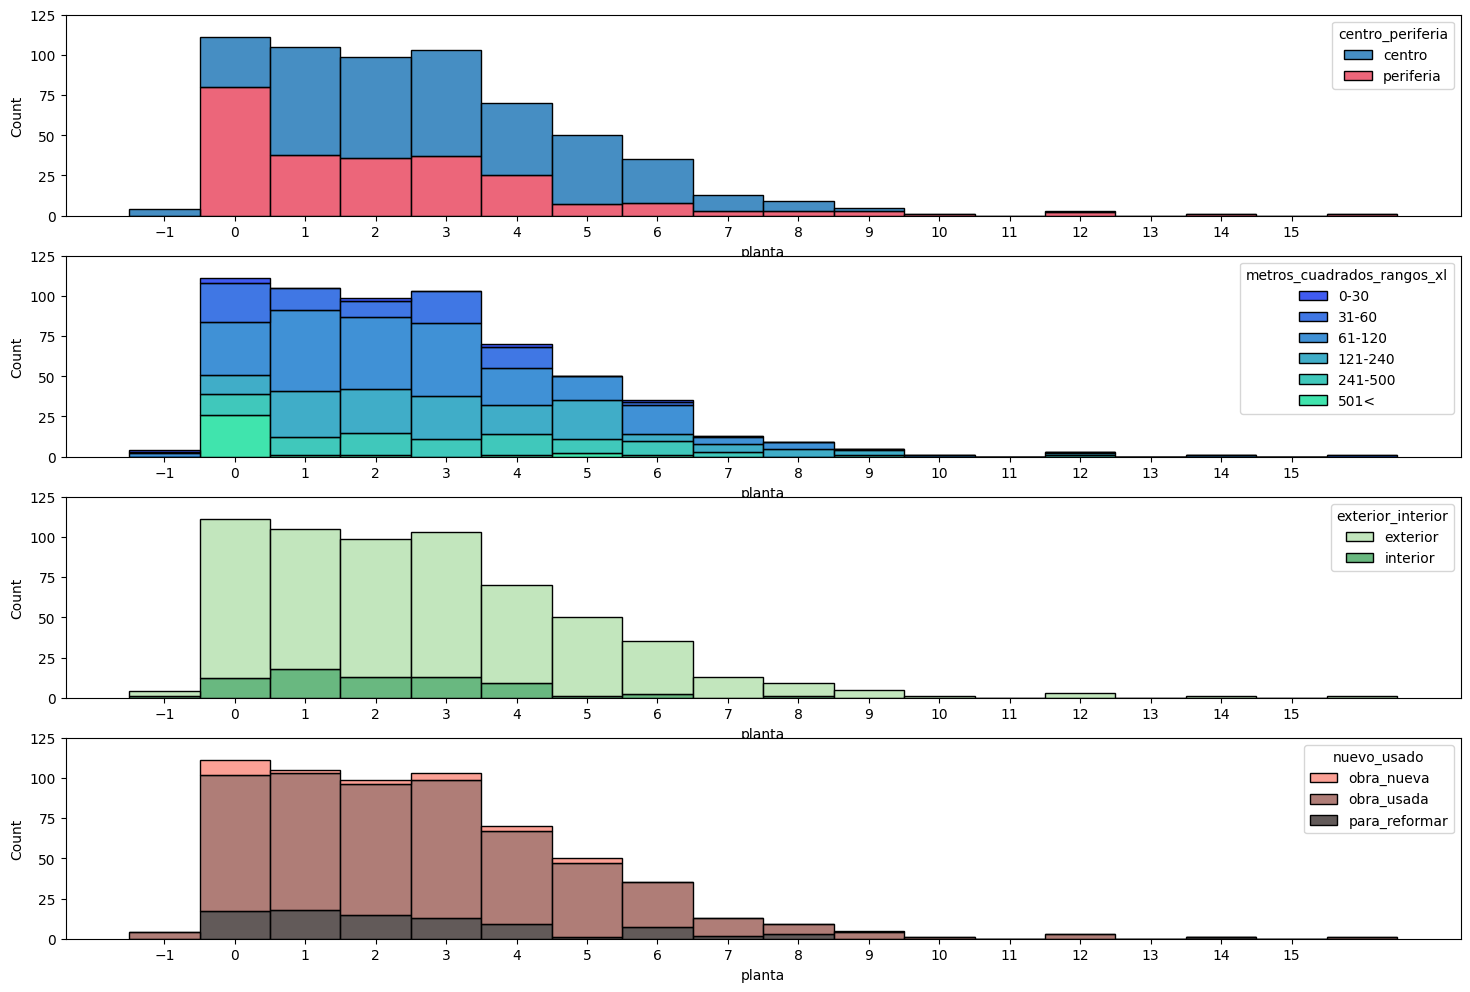

planta_rangos_xl
1º - 3º               307
4º - 5º               120
0 (Bajo o Semi-S.)     71
6º o 7º                48
0 (Chalet)             44
8º o más               20
Name: count, dtype: Int64

In [128]:
df_plot = df.copy()
fig, (ax1, ax2, ax3, ax5) = plt.subplots(4, 1, figsize=(18, 12))
sns.histplot(data=df_plot, ax=ax1, x="planta", hue="centro_periferia", palette=centro_periferia_colors, hue_order=centro_periferia_orden, multiple="stack", binrange=(-1,16), discrete=True, binwidth=1)
sns.histplot(data=df_plot, ax=ax2, x="planta", hue="metros_cuadrados_rangos_xl", palette=metros_cuadrados_rangos_xl_colors, hue_order=metros_cuadrados_rangos_xl_orden, multiple="stack", binrange=(-1,16), discrete=True, binwidth=1)
sns.histplot(data=df_plot, ax=ax3, x="planta", hue="exterior_interior", palette=exterior_interior_colors, hue_order=exterior_interior_orden, multiple="stack", binrange=(-1, 16), discrete=True, binwidth=1)
sns.histplot(data=df_plot, ax=ax5, x="planta", hue="nuevo_usado", palette=nuevo_usado_colors, hue_order=nuevo_usado_orden, multiple="stack", binrange=(-1, 16), discrete=True, binwidth=1)

ax1.set_yticks(range(0, 150, 25))
ax2.set_yticks(range(0, 150, 25))
ax3.set_yticks(range(0, 150, 25))
ax5.set_yticks(range(0, 150, 25))
ax1.set_xticks(range(-1, 16, 1))
ax2.set_xticks(range(-1, 16, 1))
ax3.set_xticks(range(-1,16, 1))
ax5.set_xticks(range(-1, 16, 1))
plt.show()
df['planta_rangos_xl'].value_counts()


np.int64(3015)

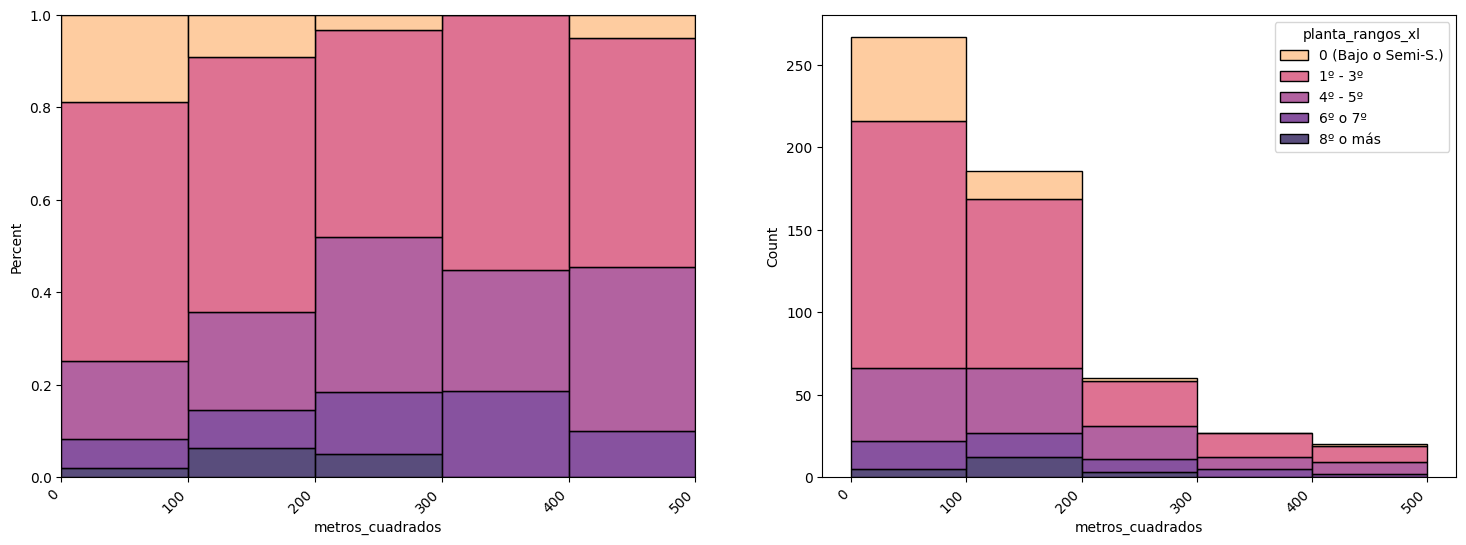

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))

sns.histplot(data=df_plot, ax=ax2, x="metros_cuadrados", hue='planta_rangos_xl', palette=planta_rangos_xl_colors, hue_order=planta_pisos_rangos_xl_orden, multiple="stack", binwidth=100, binrange=(0, 500))
sns.histplot(data=df_plot, ax=ax1, x="metros_cuadrados", hue='planta_rangos_xl', palette=planta_rangos_xl_colors, hue_order=planta_pisos_rangos_xl_orden, multiple="fill", stat='percent', binwidth=100, binrange=(0, 500), legend=False)
plt.setp([ax1.get_xticklabels(), ax2.get_xticklabels()], rotation=45, ha='right');

df_plot['metros_cuadrados'].max()

metros_cuadrados_rangos_xl
61-120     243
121-240    155
31-60       86
241-500     85
501<        32
0-30         9
Name: count, dtype: int64

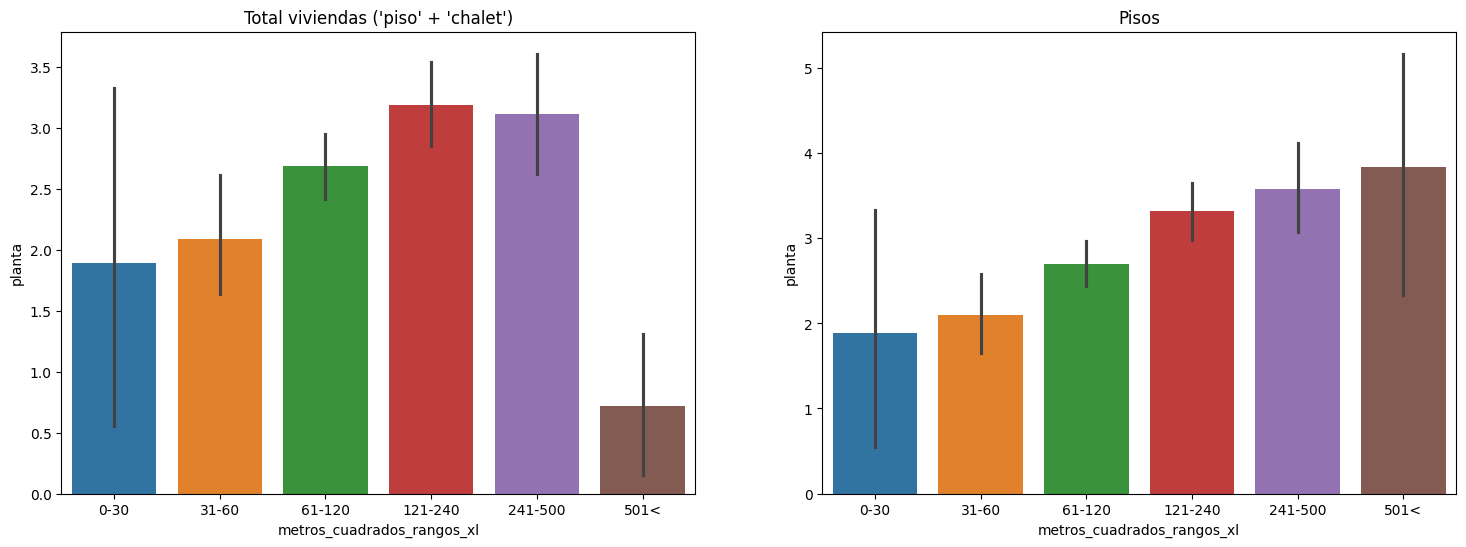

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=df,ax=ax1, x="metros_cuadrados_rangos_xl", y="planta", hue='metros_cuadrados_rangos_xl')
ax1.set_title("Total viviendas ('piso' + 'chalet')")
sns.barplot(data=df_pisos,ax=ax2, x="metros_cuadrados_rangos_xl", y="planta", hue='metros_cuadrados_rangos_xl')
ax2.set_title("Pisos")
df['metros_cuadrados_rangos_xl'].value_counts()

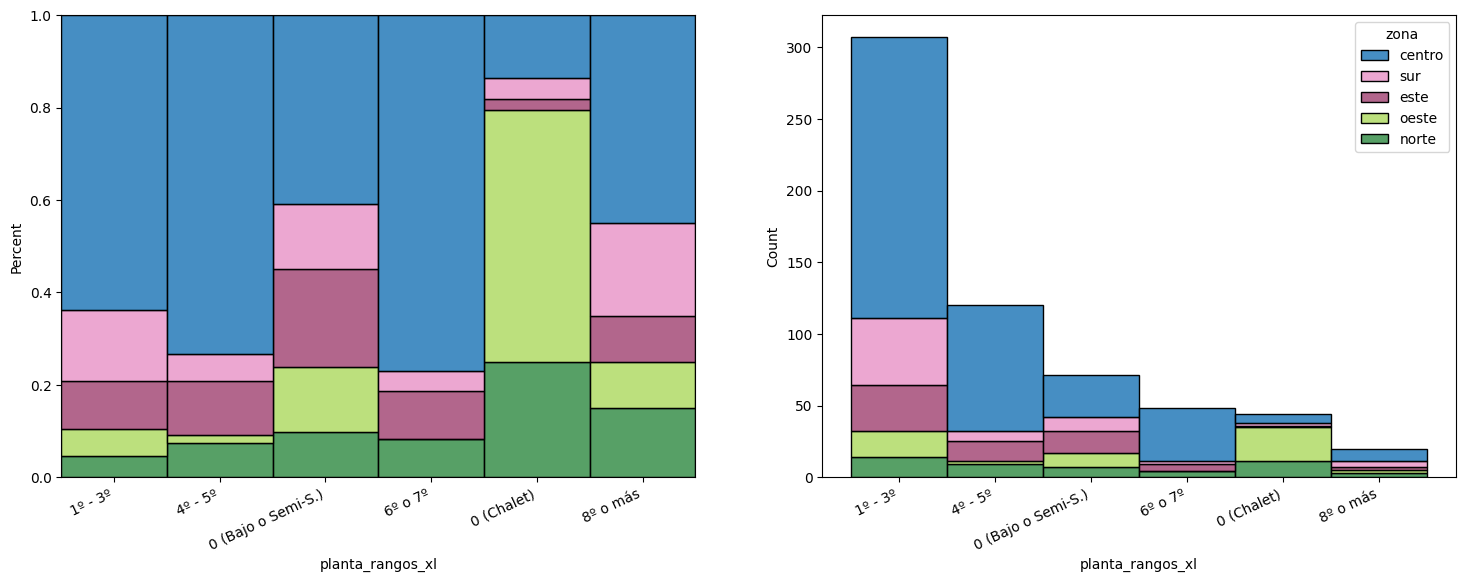

In [66]:
df_plot = df.copy()
df_plot['planta_rangos_xl'] = pd.Categorical(df_plot['planta_rangos_xl'], categories=df_plot['planta_rangos_xl'].value_counts().index, ordered=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data=df_plot, ax=ax2, x="planta_rangos_xl", hue="zona", hue_order=zonas_orden, palette=zona_colors, multiple="stack", bins=1)
sns.histplot(data=df_plot, ax=ax1, x="planta_rangos_xl", hue="zona", hue_order=zonas_orden, palette=zona_colors, multiple="fill", stat="percent", bins=1, legend=False)
plt.setp([ax1.get_xticklabels(), ax2.get_xticklabels()], rotation=25, ha='right');

### * `exterior_interior`

centro_periferia  exterior_interior
centro            exterior             316
                  interior              49
periferia         exterior             224
                  interior              21
Name: count, dtype: int64

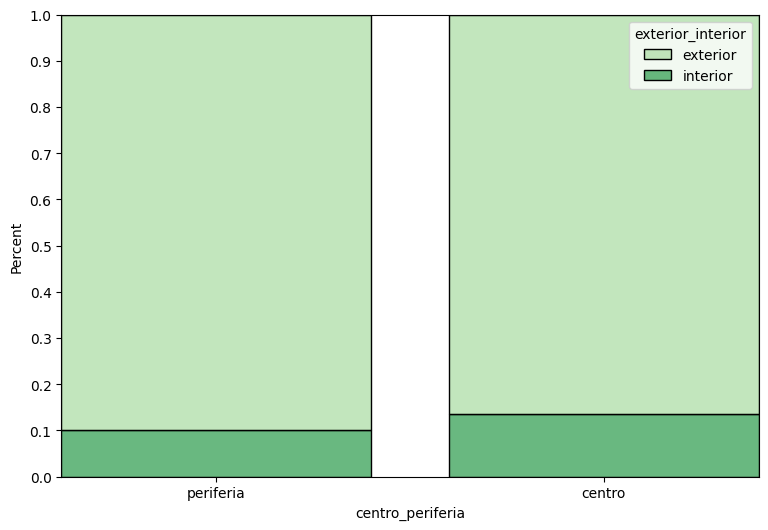

In [134]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df_pisos, x="centro_periferia", shrink=0.8, hue="exterior_interior", hue_order=exterior_interior_orden, multiple="fill", stat='percent', palette=exterior_interior_colors, bins=1)
plt.yticks(np.arange(0, 1.01, 0.1));
df.groupby('centro_periferia')['exterior_interior'].value_counts()

exterior_interior
exterior    66
interior     3
Name: count, dtype: int64

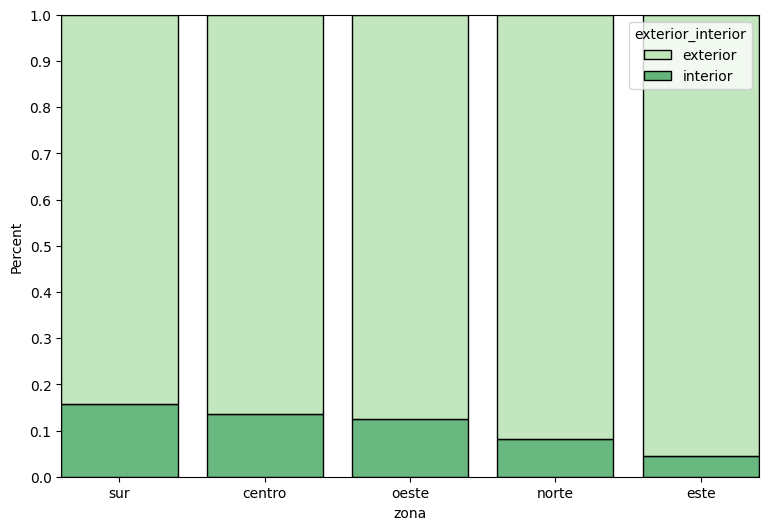

In [135]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df_pisos, x="zona", shrink=0.8, hue="exterior_interior", hue_order=exterior_interior_orden, multiple="fill", stat='percent', palette=exterior_interior_colors, bins=1)
plt.yticks(np.arange(0, 1.01, 0.1));
df[df['zona']=='este']['exterior_interior'].value_counts()

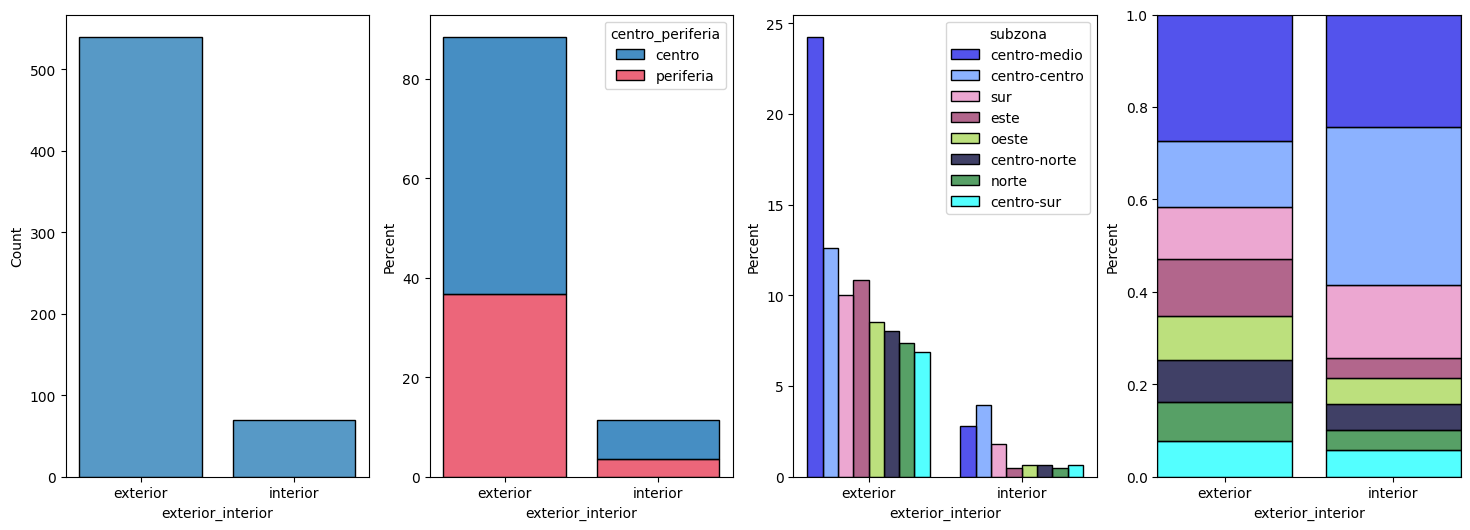

In [69]:
orden_frecuencia_ext_int = df['exterior_interior'].value_counts().index.tolist()
df['exterior_interior'] = df['exterior_interior'].astype('category').cat.reorder_categories(orden_frecuencia_ext_int)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=((18, 6)))
sns.histplot(data=df,ax=ax1, x="exterior_interior", shrink=0.8, multiple="stack", bins=1)
sns.histplot(data=df,ax=ax2, x="exterior_interior", shrink=0.8, hue="centro_periferia", hue_order=centro_periferia_orden, multiple="stack", stat='percent', palette=centro_periferia_colors, bins=1)
sns.histplot(data=df,ax=ax3, x="exterior_interior", shrink=0.8, hue='subzona', hue_order=subzonas_orden_count, palette=subzona_colors, stat='percent', multiple='dodge')
sns.histplot(data=df,ax=ax4, x="exterior_interior", shrink=0.8, hue="subzona", multiple="fill", stat='percent',hue_order=subzonas_orden_count, palette=subzona_colors, bins=1, legend=False);

### * `nuevo_usado`

centro_periferia  nuevo_usado  
centro            obra_usada       299
                  para_reformar     56
                  obra_nueva        10
periferia         obra_usada       200
                  para_reformar     30
                  obra_nueva        15
Name: count, dtype: int64

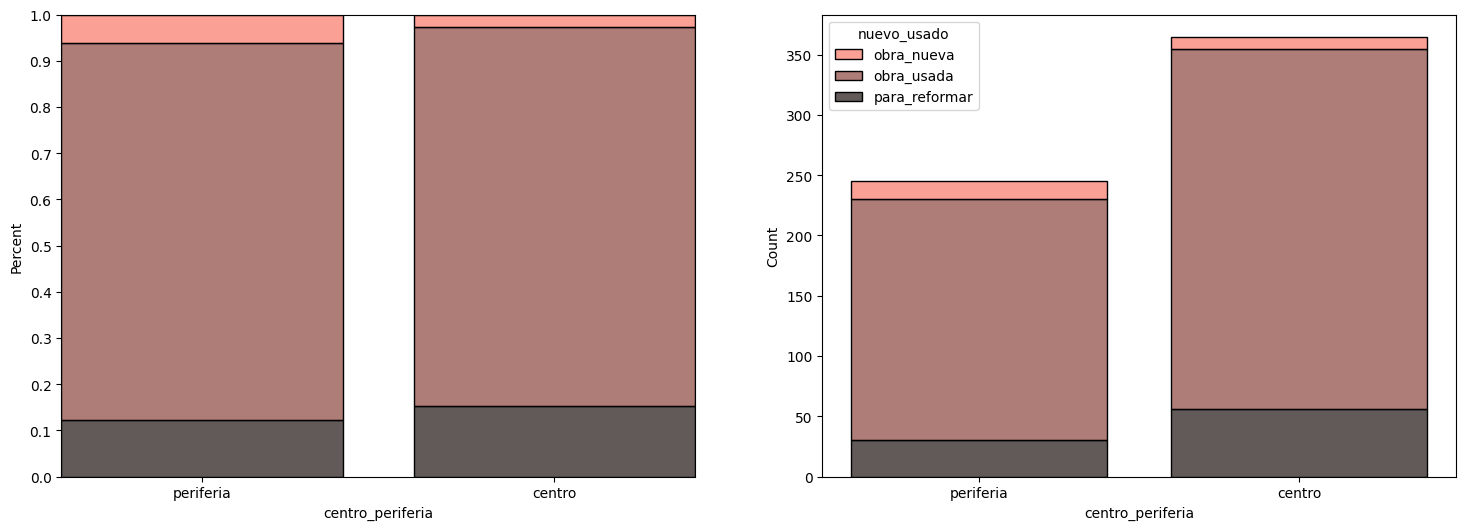

<Figure size 1800x600 with 0 Axes>

In [138]:
df_plot = df.copy()
df_plot['nuevo_usado'] = pd.Categorical(df_plot['nuevo_usado'], categories=nuevo_usado_orden, ordered=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data=df_plot,ax=ax1, legend=False, x="centro_periferia", hue="nuevo_usado", multiple="fill", stat='percent', hue_order=nuevo_usado_orden, shrink=0.8, palette=nuevo_usado_colors, bins=1)
sns.histplot(data=df_plot,ax=ax2, x="centro_periferia", hue="nuevo_usado", multiple="stack", stat='count', hue_order=nuevo_usado_orden, shrink=0.8, palette=nuevo_usado_colors, bins=1)
plt.figure(figsize=(18, 6))

ax1.set_yticks(np.arange(0, 1.01, 0.1));
df_plot.groupby('centro_periferia')['nuevo_usado'].value_counts()

<Figure size 1800x600 with 0 Axes>

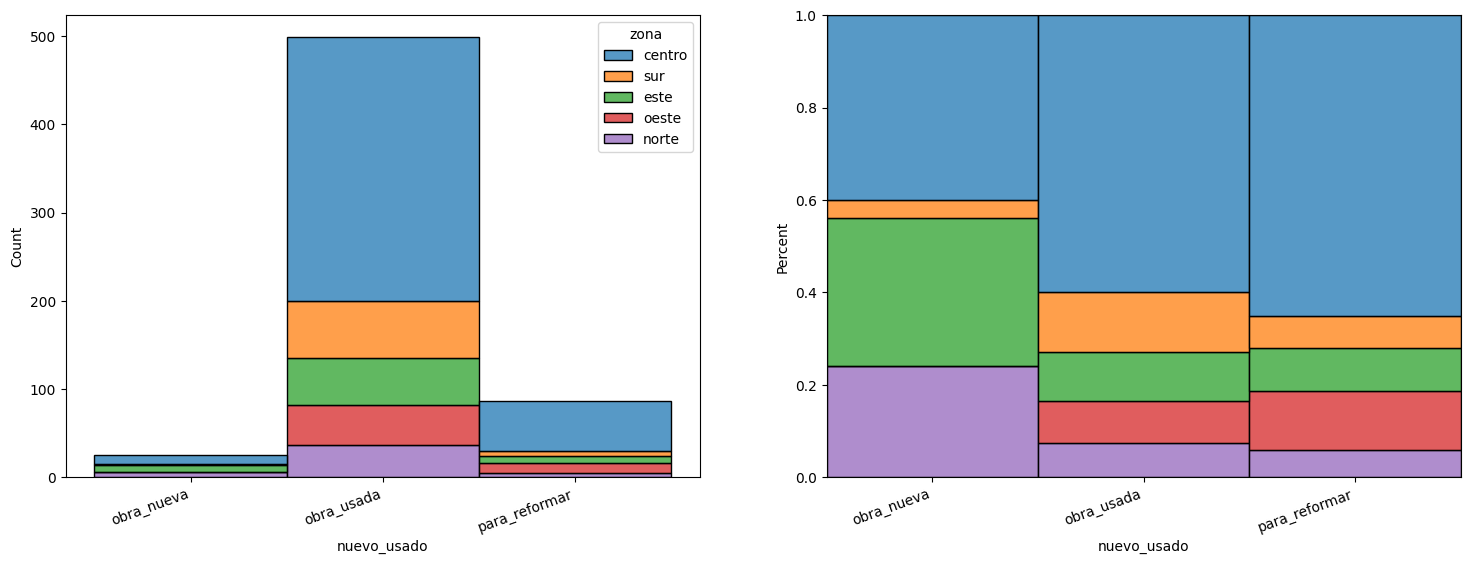

In [139]:
df_plot = df.copy()
df_plot['zona'] = pd.Categorical(df_plot['zona'], categories=df_plot['zona'].value_counts().index, ordered=True)
df_plot['nuevo_usado'] = pd.Categorical(df_plot['nuevo_usado'], categories=nuevo_usado_orden, ordered=True)

plt.figure(figsize=(18, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(data=df_plot,ax=ax1, x="nuevo_usado", hue="zona", hue_order=zonas_orden, multiple="stack", bins=1)
sns.histplot(data=df_plot, ax=ax2, x="nuevo_usado", hue="zona", hue_order=zonas_orden, multiple="fill", stat="percent", bins=1, legend=False)

plt.setp([ax1.get_xticklabels(), ax2.get_xticklabels()], rotation=20, ha='right');

## ESPACIO

### * `metros_cuadrados(_rangos)`

#### - sqm + `precio_en_euros`

In [72]:
df_sin_outliers_metros_cuadrados[['metros_cuadrados']].describe()

,metros_cuadrados
count,569.000000
mean,133.488576
std,91.215638
min,20.000000
25%,69.000000
50%,103.000000
75%,165.000000
max,450.000000


In [73]:
df[['metros_cuadrados']].describe()

,metros_cuadrados
count,610.000000
mean,178.991803
std,224.723165
min,20.000000
25%,70.000000
50%,109.500000
75%,198.750000
max,3015.000000


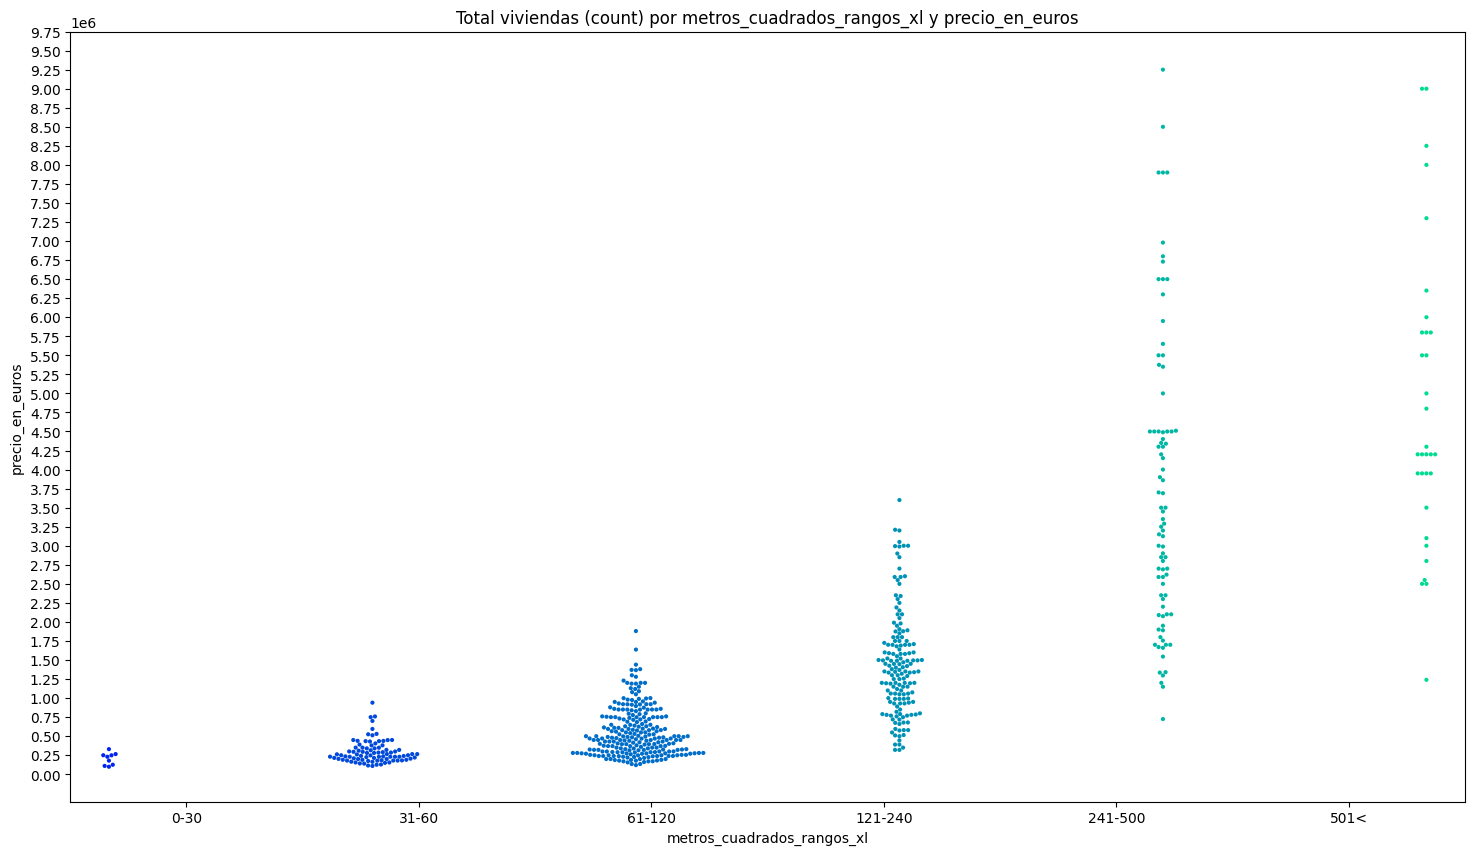

In [141]:
plt.figure(figsize=(18, 10))
sns.swarmplot(data=df, x="metros_cuadrados_rangos_xl", y="precio_en_euros", hue="metros_cuadrados_rangos_xl", palette=metros_cuadrados_rangos_xl_colors, dodge=True, size=3)
plt.yticks(range(0, 10000000, 250000))
plt.title('Total viviendas (count) por metros_cuadrados_rangos_xl y precio_en_euros');

<Figure size 1200x800 with 0 Axes>

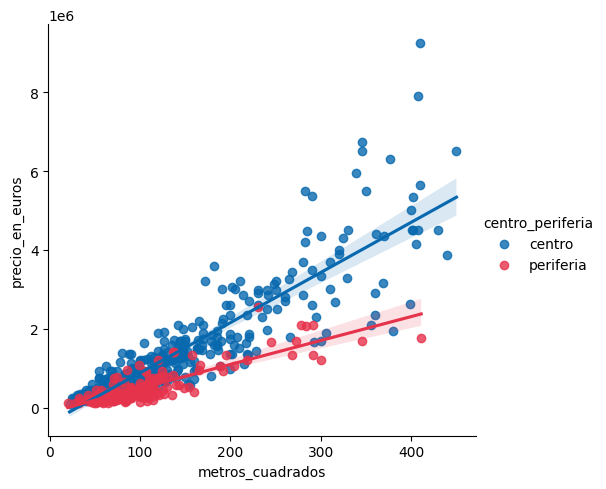

In [151]:
from numpy import size


df_plot = df_pisos_sin_outliers_metros_cuadrados.copy()

plt.figure(figsize=(12, 8))
sns.lmplot(data=df_plot, x="metros_cuadrados", y="precio_en_euros", hue="centro_periferia", hue_order=centro_periferia_orden, palette=centro_periferia_colors);

#### - sqm + `centro_periferia`

In [153]:
df_plot.groupby('zona')['metros_cuadrados'].agg(['mean','median','std'])


,mean,median,std
zona,,,
centro,170.317808,128.0,133.275897
este,82.565217,74.0,36.291904
norte,248.687500,133.5,282.232073
oeste,417.464286,153.5,532.815300
sur,83.430556,76.0,37.056039


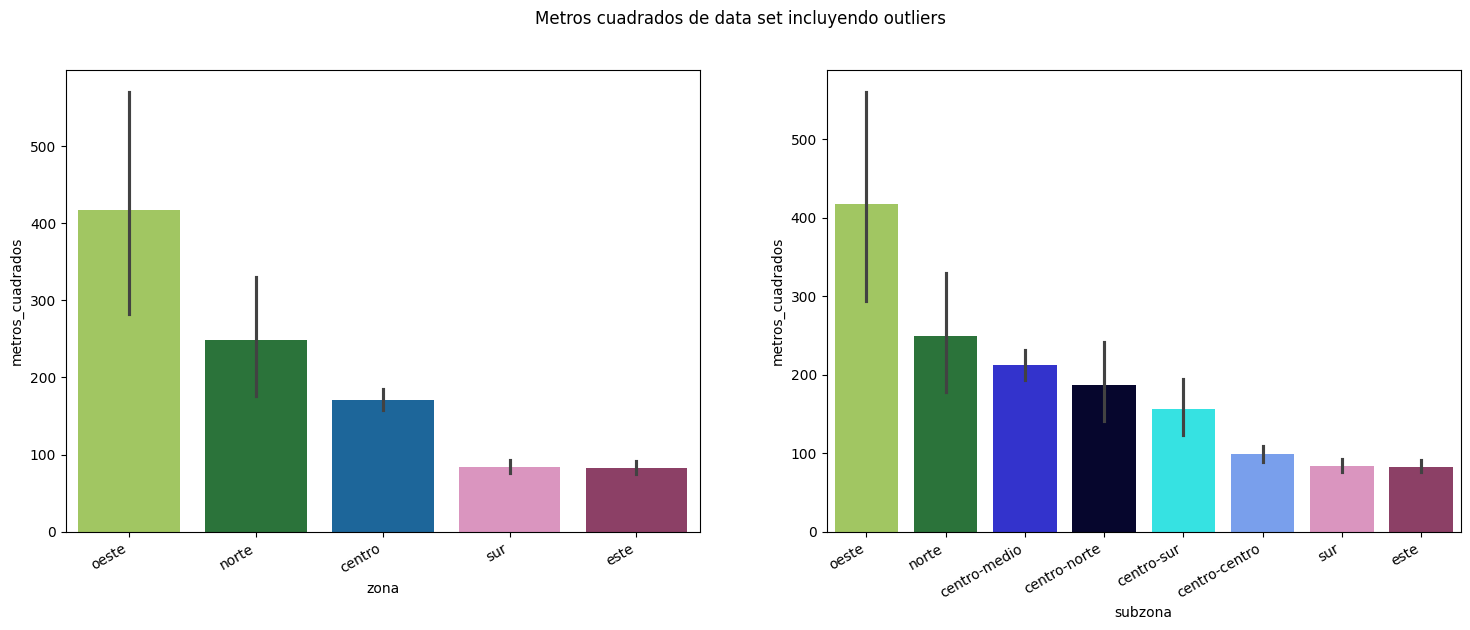

In [155]:
df_plot = df
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot( data=df_plot, x="subzona", ax=ax2, y="metros_cuadrados", hue="subzona", order=['oeste', 'norte','centro-medio','centro-norte','centro-sur', 'centro-centro','sur', 'este'], hue_order=subzonas_orden, palette=subzona_colors, estimator=np.mean)
sns.barplot(data=df_plot,x="zona",ax=ax1,y="metros_cuadrados",hue= 'zona',palette=zona_colors, order=['oeste', 'norte','centro','sur', 'este'], estimator=np.mean)
for ax in [ax1, ax2]: plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.suptitle("Metros cuadrados de data set incluyendo outliers");

In [156]:
df_sin_outliers_metros_cuadrados.groupby('zona')['metros_cuadrados'].agg(['mean','median','std'])

,mean,median,std
zona,,,
centro,151.618911,125.0,97.774052
este,82.565217,74.0,36.291904
norte,152.285714,123.0,96.214264
oeste,133.513514,98.0,97.698408
sur,83.430556,76.0,37.056039


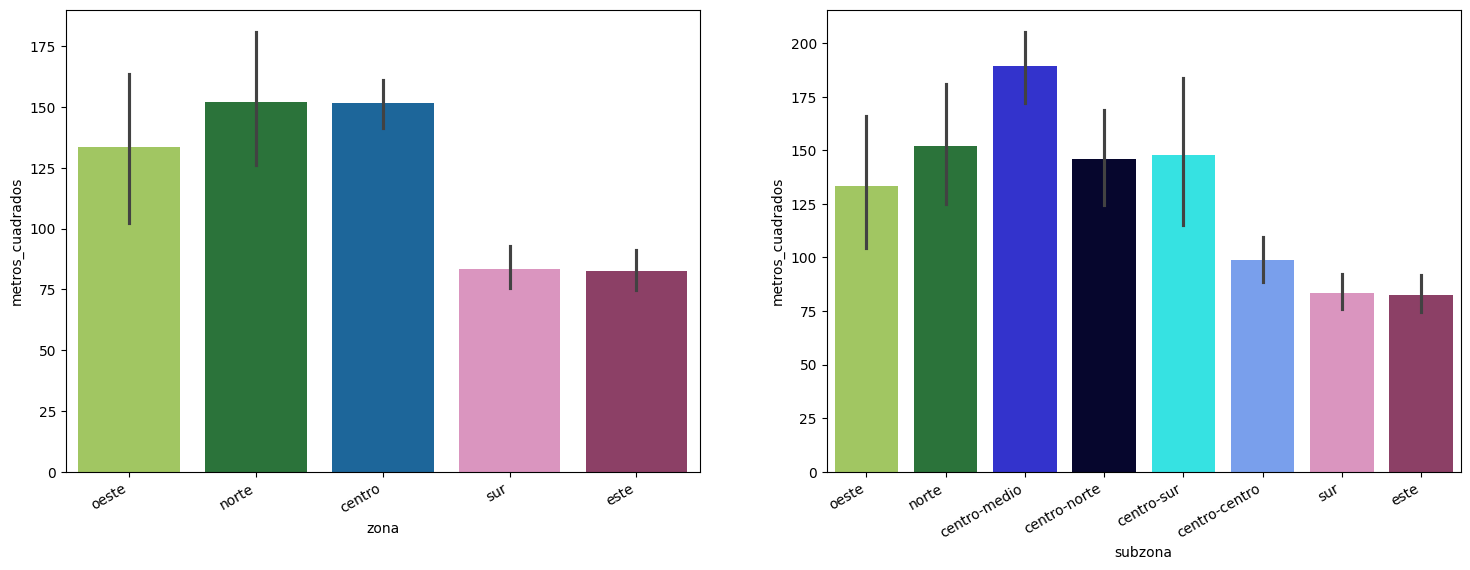

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot( data=df_sin_outliers_metros_cuadrados, x="subzona", ax=ax2, y="metros_cuadrados", hue="subzona", order=['oeste', 'norte','centro-medio','centro-norte','centro-sur', 'centro-centro','sur', 'este'], hue_order=subzonas_orden, palette=subzona_colors, estimator=np.mean)
sns.barplot(data=df_sin_outliers_metros_cuadrados,x="zona",ax=ax1,y="metros_cuadrados",hue= 'zona',palette=zona_colors, order=['oeste', 'norte','centro','sur', 'este'], estimator=np.mean)
for ax in [ax1, ax2]: plt.setp(ax.get_xticklabels(), rotation=30, ha='right');

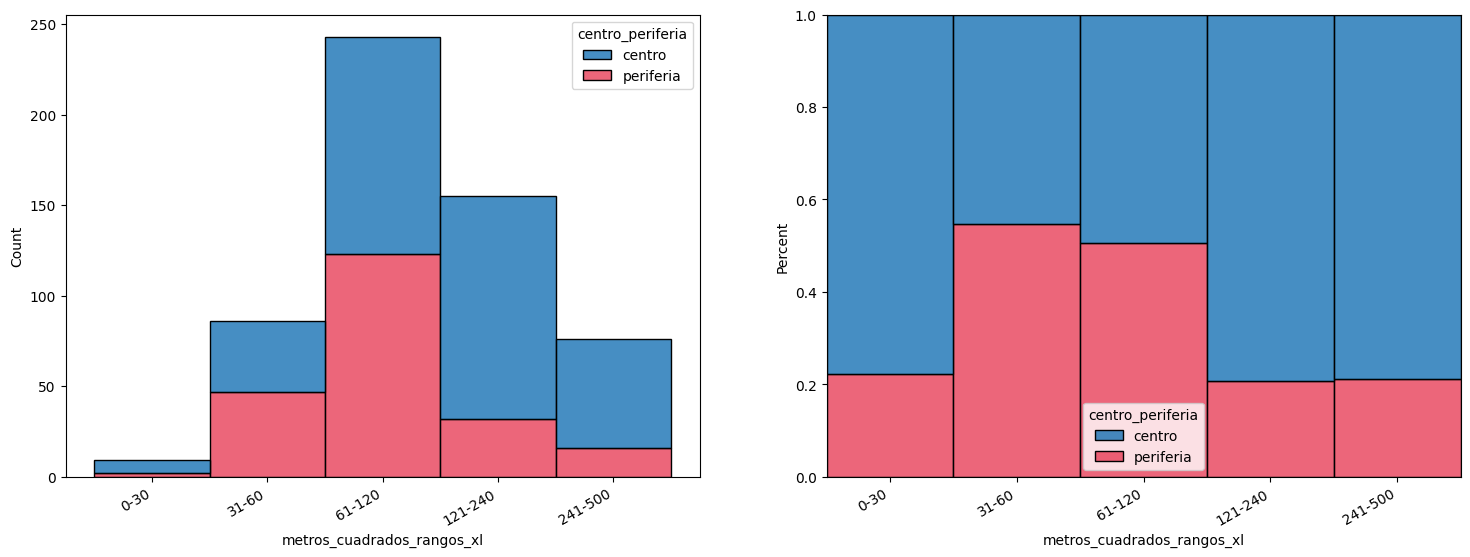

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))
sns.histplot(data=df_sin_outliers_metros_cuadrados, x="metros_cuadrados_rangos_xl", hue_order=centro_periferia_orden, palette=centro_periferia_colors, multiple="fill", stat='percent', hue="centro_periferia", ax=ax2)
sns.histplot(data=df_sin_outliers_metros_cuadrados, x="metros_cuadrados_rangos_xl", hue_order=centro_periferia_orden, palette=centro_periferia_colors, multiple="stack", hue="centro_periferia", ax=ax1)
[plt.setp(ax.get_xticklabels(), rotation=30, ha='right') for ax in [ax1, ax2]];


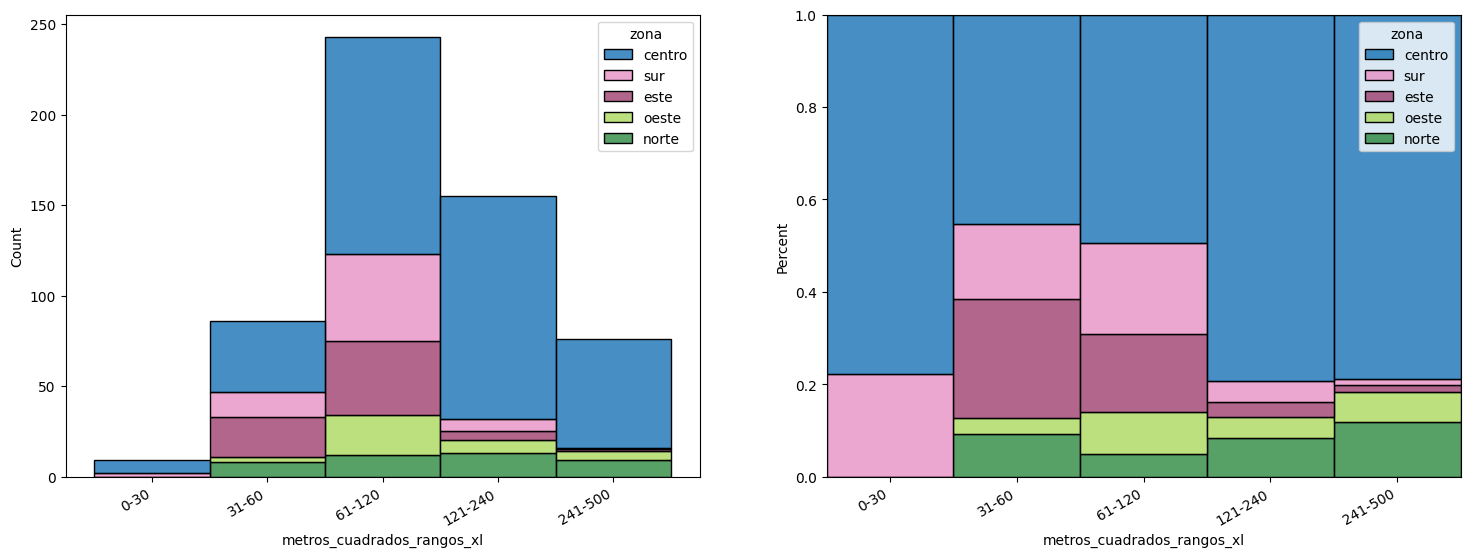

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))
sns.histplot(data=df_sin_outliers_metros_cuadrados, x="metros_cuadrados_rangos_xl", hue_order=zonas_orden, palette=zona_colors, multiple="fill", stat='percent', hue="zona", ax=ax2)
sns.histplot(data=df_sin_outliers_metros_cuadrados, x="metros_cuadrados_rangos_xl", hue_order=zonas_orden, palette=zona_colors, multiple="stack", hue="zona", ax=ax1)
[plt.setp(ax.get_xticklabels(), rotation=30, ha='right') for ax in [ax1, ax2]];

#### - sqm + `tipo_inmueble`

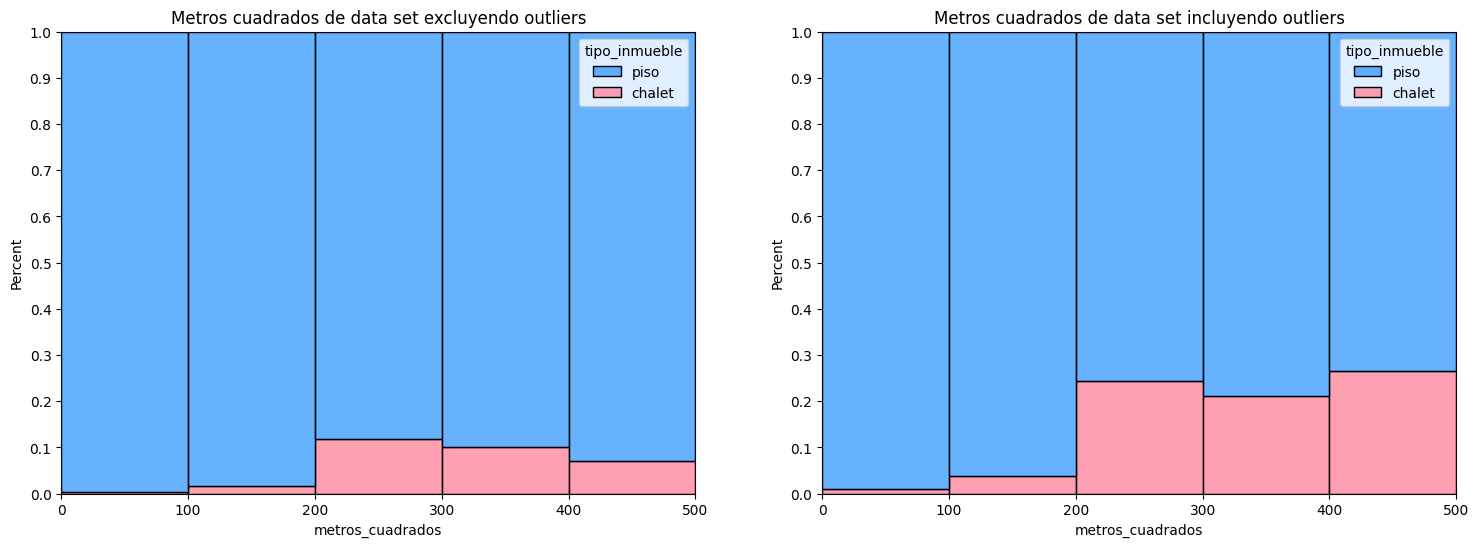

In [161]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))
sns.histplot(data=df, x="metros_cuadrados", multiple="fill", stat="percent", hue="tipo_inmueble",hue_order=tipo_inmueble_colors,palette=tipo_inmueble_colors, ax=ax2, binwidth=100, binrange=(0, 500))
sns.histplot(data=df_sin_outliers_metros_cuadrados, x="metros_cuadrados", multiple="fill", stat="percent", hue="tipo_inmueble",hue_order=tipo_inmueble_colors,palette=tipo_inmueble_colors, ax=ax1, binwidth=100, binrange=(0, 500))
ax1.set_yticks(np.arange(0, 1.01, 0.1))
ax1.set_title("Metros cuadrados de data set excluyendo outliers")
ax2.set_title("Metros cuadrados de data set incluyendo outliers")
ax2.set_yticks(np.arange(0, 1.01, 0.1));

#### - sqm + `planta`, `planta_rangos(_xl)`

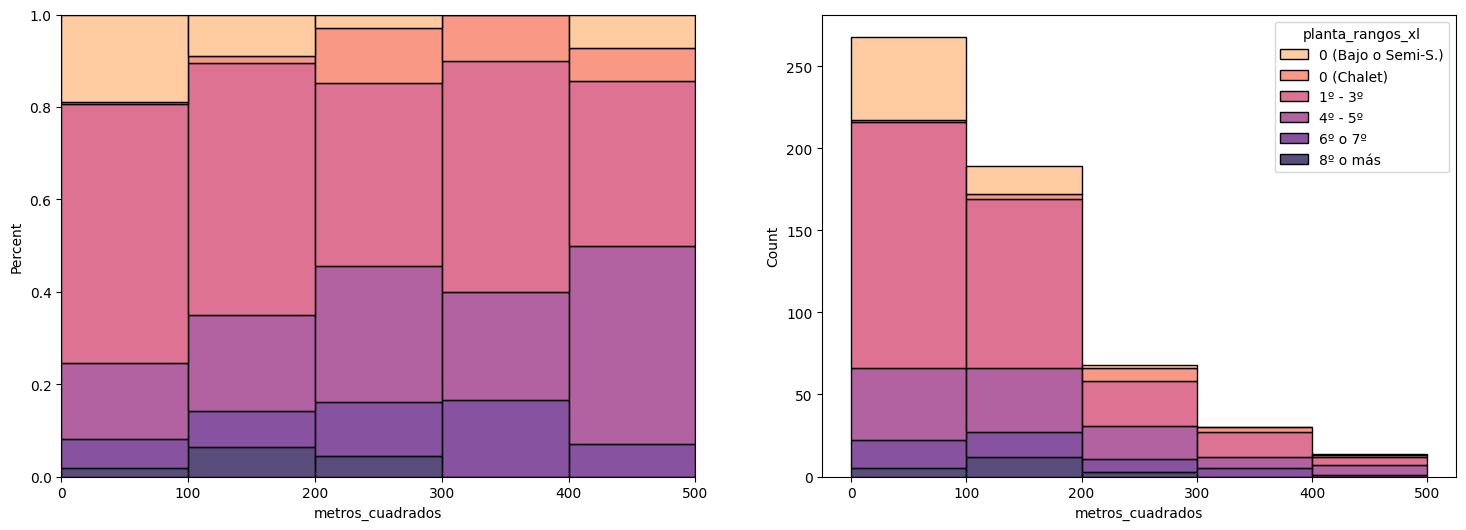

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))
sns.histplot(data=df_sin_outliers_metros_cuadrados, x="metros_cuadrados", multiple="stack", hue="planta_rangos_xl",hue_order=planta_rangos_xl_colors,palette=planta_rangos_xl_colors, ax=ax2, binwidth=100, binrange=(0, 500))
sns.histplot(data=df_sin_outliers_metros_cuadrados,legend=False, x="metros_cuadrados", multiple="fill", stat="percent", hue="planta_rangos_xl",hue_order=planta_rangos_xl_colors,palette=planta_rangos_xl_colors, ax=ax1, binwidth=100, binrange=(0, 500));

#### - sqm + `exterior_interior`

In [169]:
df_pisos_sin_outliers_metros_cuadrados['metros_cuadrados'].max()

np.int64(450)

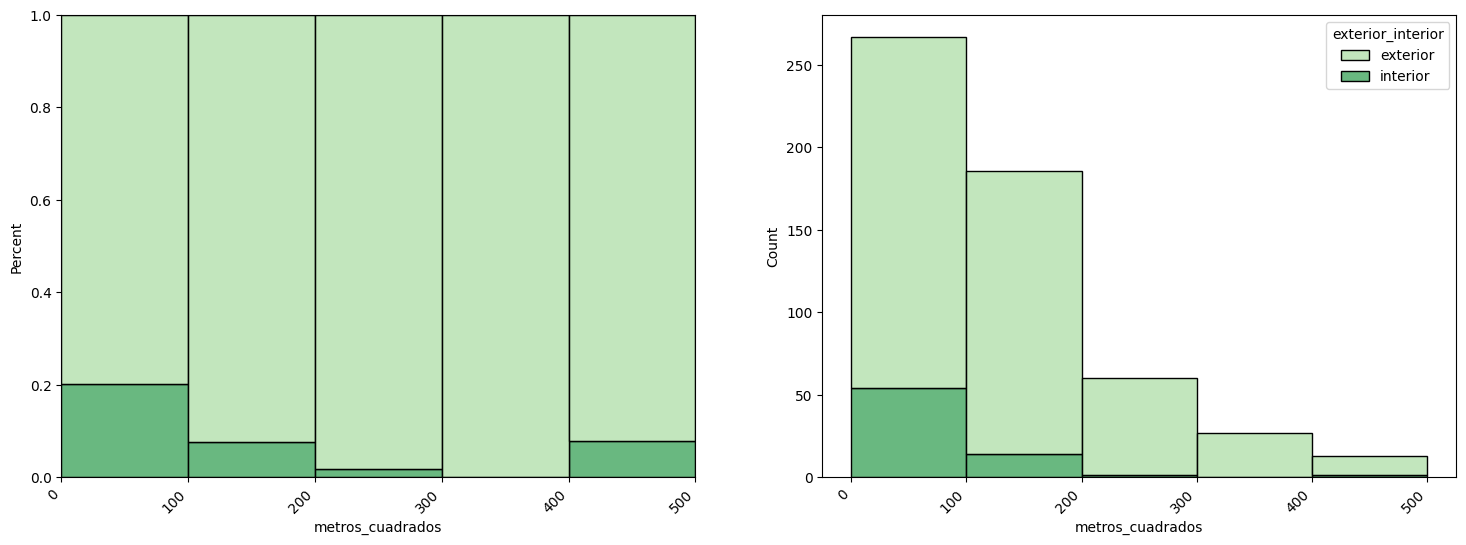

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))

sns.histplot(data=df_pisos_sin_outliers_metros_cuadrados, ax=ax2, x="metros_cuadrados", hue='exterior_interior', palette=exterior_interior_colors, hue_order=exterior_interior_orden, multiple="stack", binwidth=100, binrange=(0, 500))
sns.histplot(data=df_pisos_sin_outliers_metros_cuadrados, ax=ax1, x="metros_cuadrados", hue='exterior_interior', palette=exterior_interior_colors, hue_order=exterior_interior_orden, multiple="fill", stat='percent', binwidth=100, binrange=(0, 500), legend=False)
plt.setp([ax1.get_xticklabels(), ax2.get_xticklabels()], rotation=45, ha='right');

#### - sqm + `nuevo_usado`

In [170]:
df_sin_outliers_metros_cuadrados['metros_cuadrados'].max()

np.int64(450)

np.int64(450)

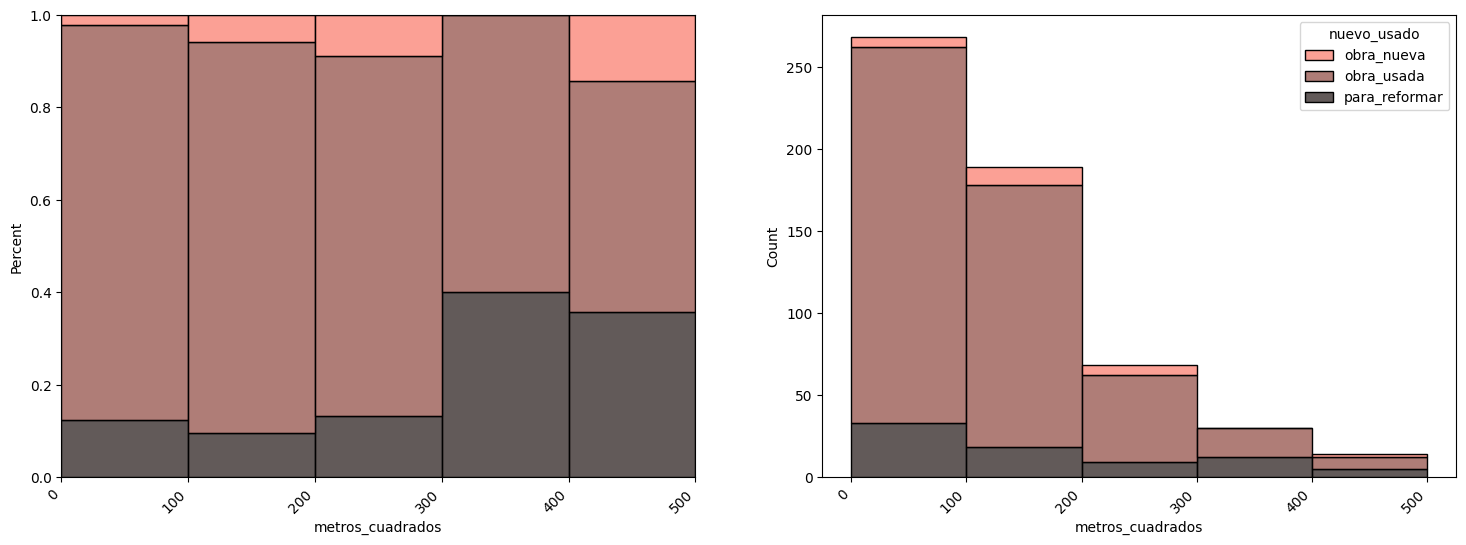

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))

sns.histplot(data=df_sin_outliers_metros_cuadrados, ax=ax2, x="metros_cuadrados", hue='nuevo_usado', palette=nuevo_usado_colors, hue_order=nuevo_usado_orden, multiple="stack", binwidth=100, binrange=(0, 500))
sns.histplot(data=df_sin_outliers_metros_cuadrados, ax=ax1, x="metros_cuadrados", hue='nuevo_usado', palette=nuevo_usado_colors, hue_order=nuevo_usado_orden, multiple="fill", stat='percent', binwidth=100, binrange=(0, 500), legend=False)
plt.setp([ax1.get_xticklabels(), ax2.get_xticklabels()], rotation=45, ha='right');

#### - sqm + `exterior_interior`

<Axes: xlabel='total_estancias', ylabel='count'>

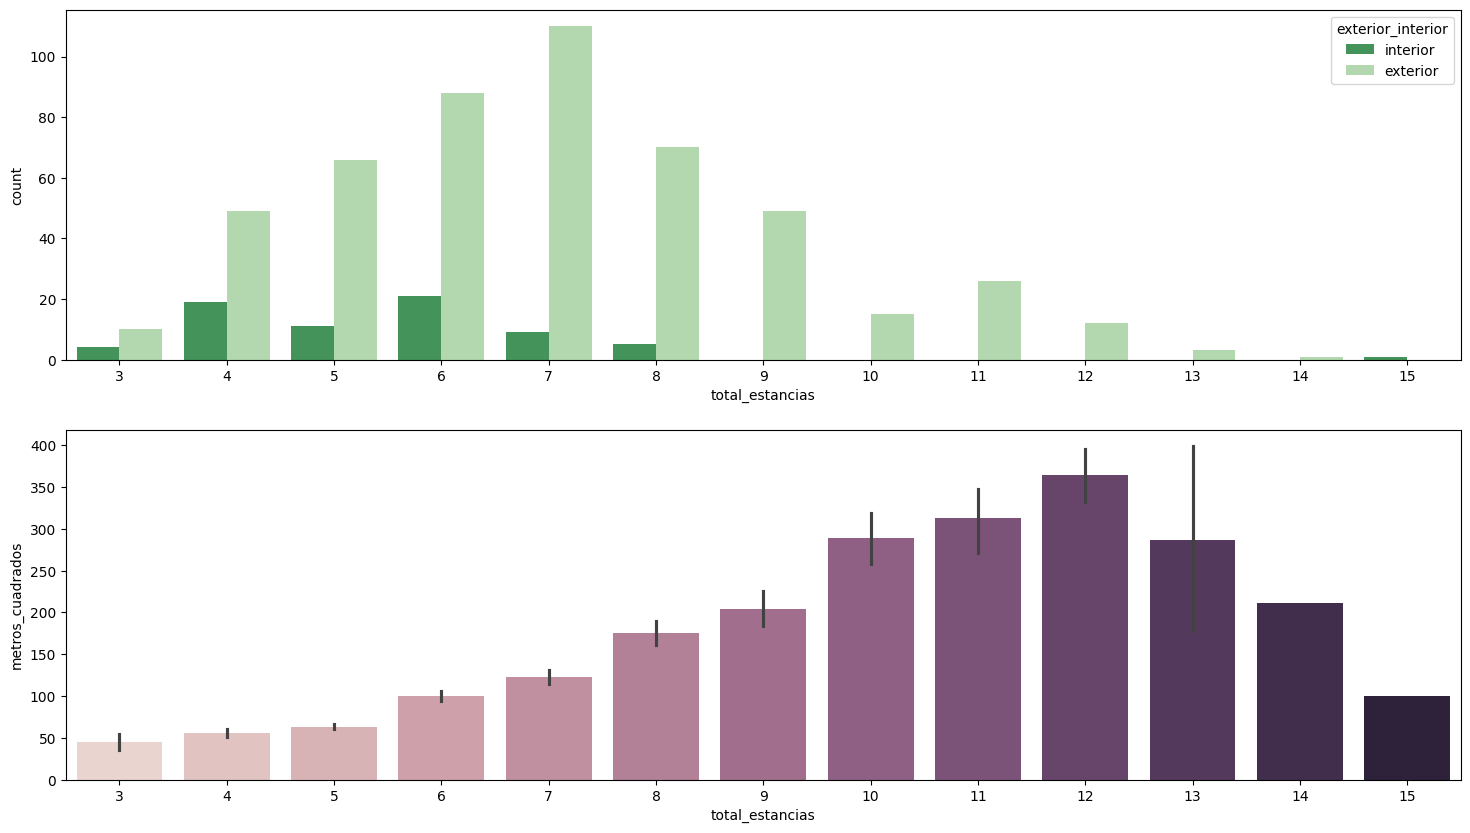

In [166]:
df_plot = df_sin_outliers_metros_cuadrados.copy()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 10))
sns.barplot(data=df_plot, ax=ax2, x="total_estancias", y="metros_cuadrados", hue='total_estancias', legend=False)
sns.countplot(data=df_plot, ax=ax1, x="total_estancias", hue="exterior_interior", palette=exterior_interior_colors)

### * `total_estancias` + sqm

<Axes: xlabel='total_estancias', ylabel='Count'>

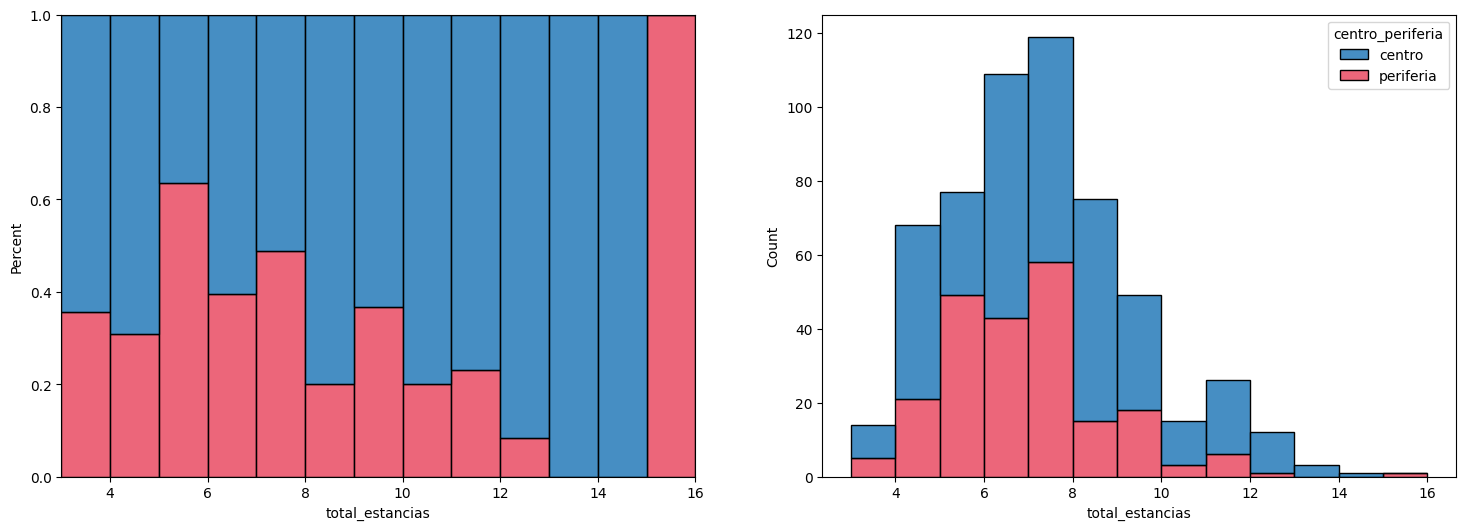

In [86]:
ord=centro_periferia_orden
pal=centro_periferia_colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((18, 6)))

sns.histplot(data=df_sin_outliers_metros_cuadrados,ax=ax1, x="total_estancias", hue="centro_periferia", hue_order=ord, palette=pal, multiple="fill", stat='percent', binwidth=1, binrange=(3, 16),legend=False)
sns.histplot(data=df_sin_outliers_metros_cuadrados,ax=ax2, x="total_estancias", hue="centro_periferia", hue_order=ord, palette=pal, multiple="stack", binwidth=1, binrange=(3, 16))

### * `num_dormitorios` & `num_aseos` + sqm

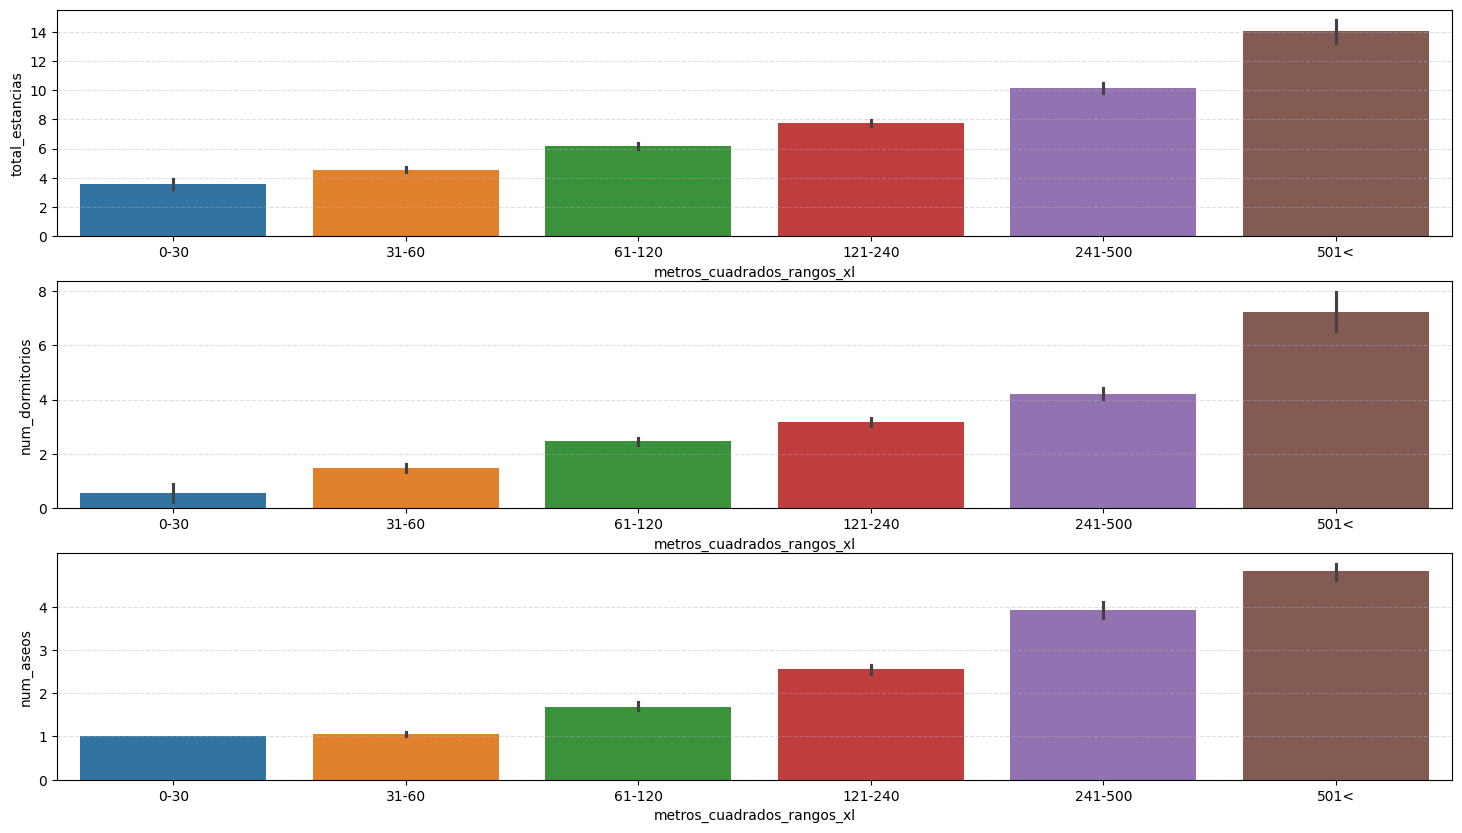

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 10))

sns.barplot(    data=df,
    ax=ax1,    x="metros_cuadrados_rangos_xl",    y="total_estancias",    hue="metros_cuadrados_rangos_xl")
ax1.set_yticks(range(0, 16, 2))
ax1.grid(axis="y", linestyle="--", alpha=0.4)

sns.barplot(data=df, ax=ax2, x="metros_cuadrados_rangos_xl", y="num_dormitorios", hue="metros_cuadrados_rangos_xl")
ax2.set_yticks(range(0, 10, 2))
ax2.grid(axis="y", linestyle="--", alpha=0.4)

sns.barplot(data=df, ax=ax3,x="metros_cuadrados_rangos_xl", y="num_aseos",hue="metros_cuadrados_rangos_xl")
ax3.set_yticks(range(0, 5, 1))
ax3.grid(axis="y", linestyle="--", alpha=0.4)

## PRECIO TOTAL

- Variables = `precio_en_euros`

### * pee + `LOCALIZACIÓN`

In [173]:
df.groupby('precio_en_euros_rangos')['centro_periferia'].value_counts()

precio_en_euros_rangos         centro_periferia
10% más barato (Percentil 10)  periferia            51
                               centro               12
10% más caro (Percentil 90)    centro               45
                               periferia            16
15% barato-intermedio          periferia            71
                               centro               19
15% caro-intermedio            centro               75
                               periferia            17
50% central (IQR)              centro              214
                               periferia            90
Name: count, dtype: int64

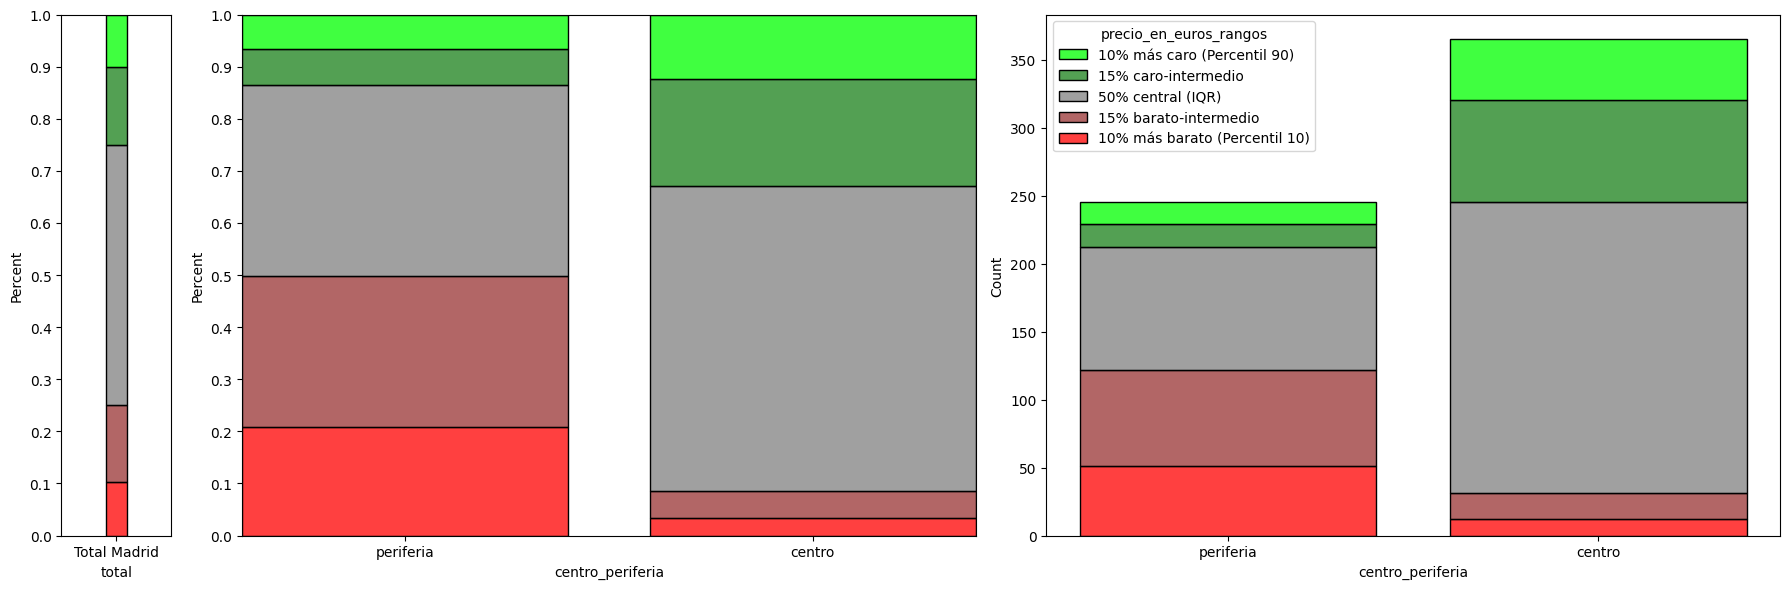

In [174]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8)
sns.histplot(data=df_plot,ax=ax2, x="centro_periferia", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="centro_periferia", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

In [175]:
df['zona'].value_counts()

zona
centro    365
sur        72
este       69
oeste      56
norte      48
Name: count, dtype: Int64

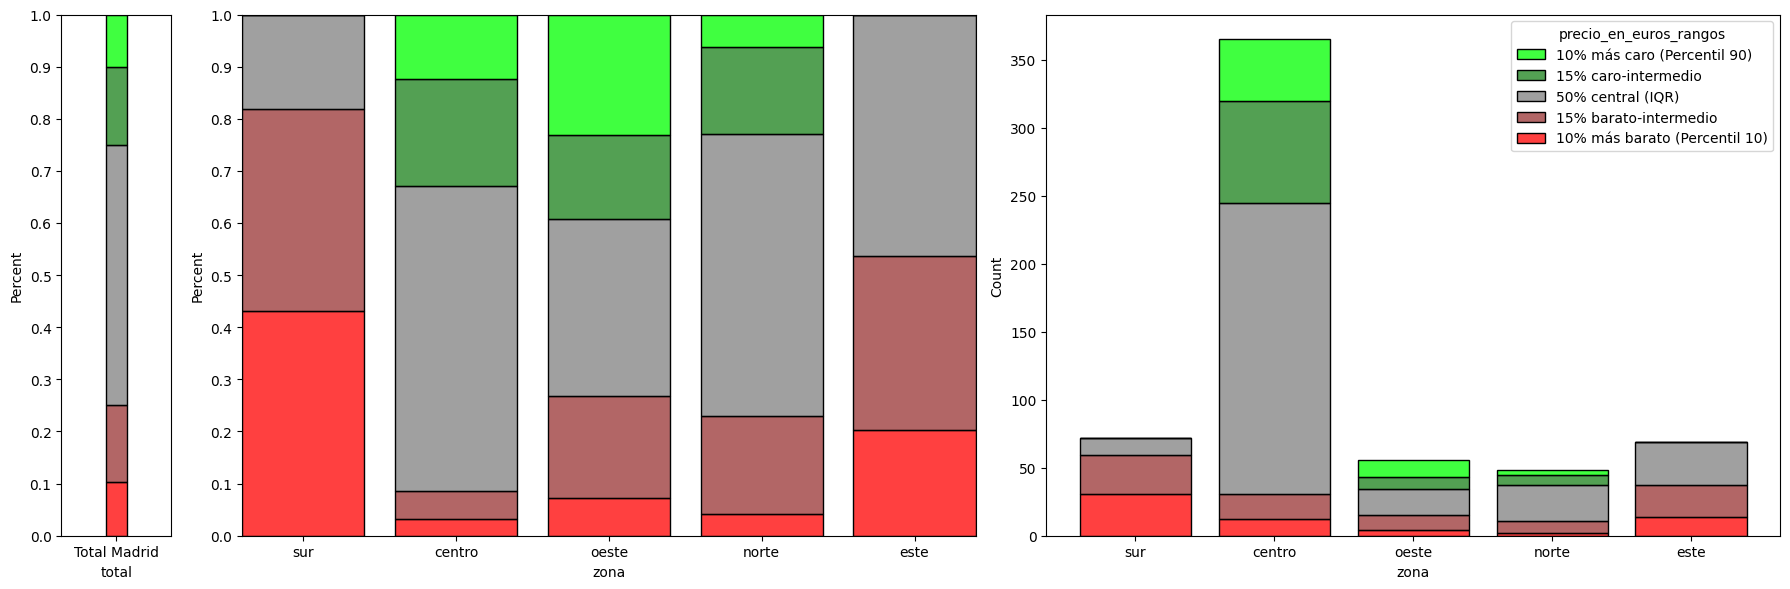

In [176]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df,ax=ax2, x="zona", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df,ax=ax3, x="zona", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

### * pee + `CARACTERÍSTICAS`

In [177]:
df['tipo_inmueble'].value_counts()

tipo_inmueble
piso      566
chalet     44
Name: count, dtype: Int64

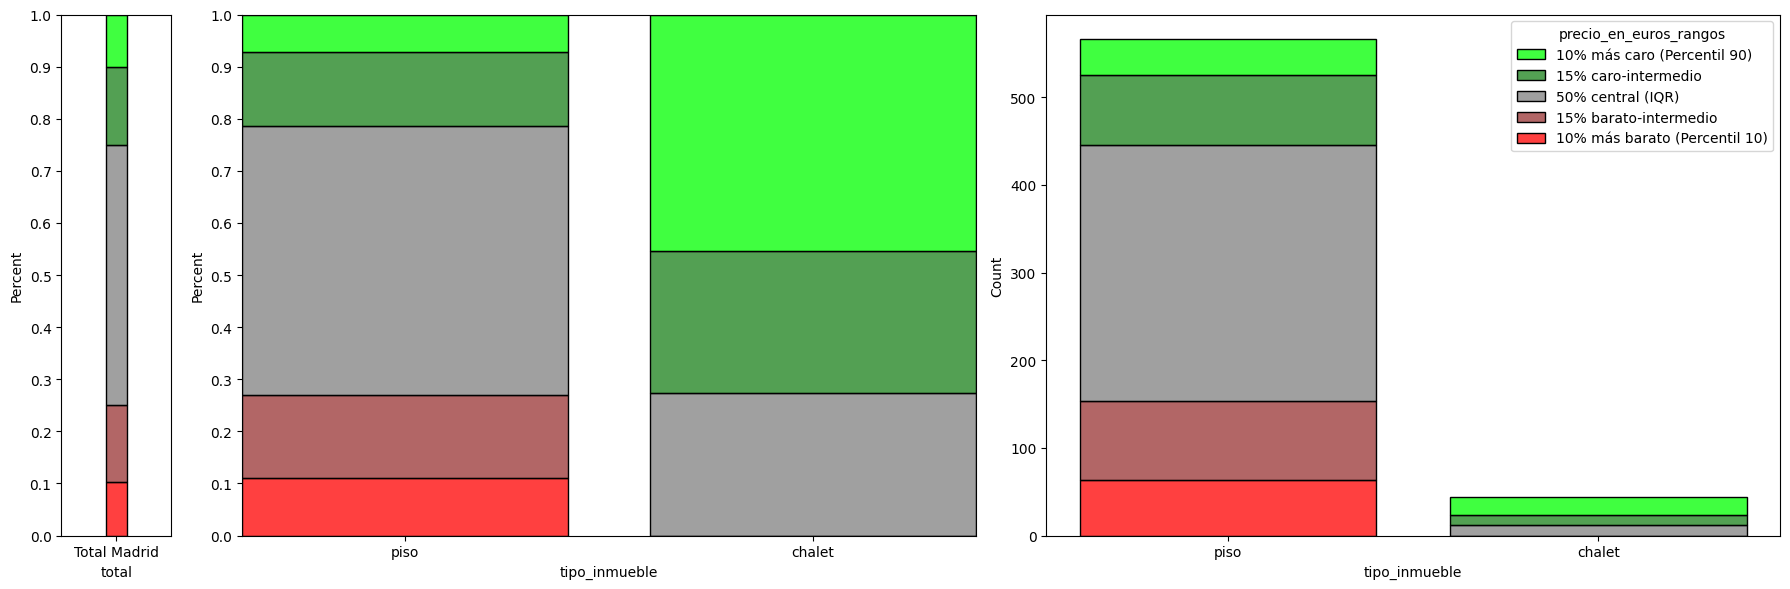

In [178]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df,ax=ax2, x="tipo_inmueble", shrink=0.8, hue="precio_en_euros_rangos", legend=False, hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df,ax=ax3, x="tipo_inmueble", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

In [179]:
df['planta_rangos_xl'].value_counts()

planta_rangos_xl
1º - 3º               307
4º - 5º               120
0 (Bajo o Semi-S.)     71
6º o 7º                48
0 (Chalet)             44
8º o más               20
Name: count, dtype: Int64

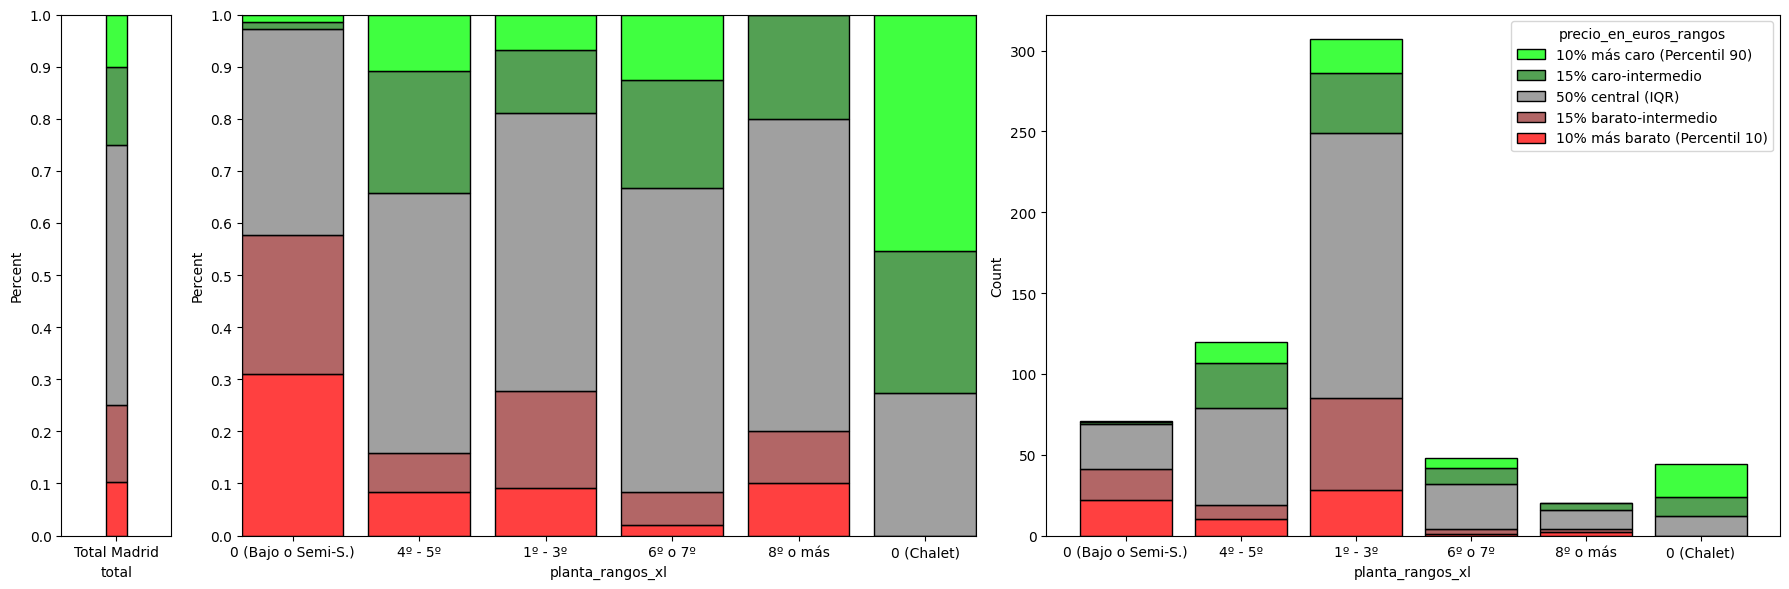

In [180]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df,ax=ax2, x="planta_rangos_xl", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df,ax=ax3, x="planta_rangos_xl", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

In [181]:
df['exterior_interior'].value_counts()

exterior_interior
exterior    540
interior     70
Name: count, dtype: int64

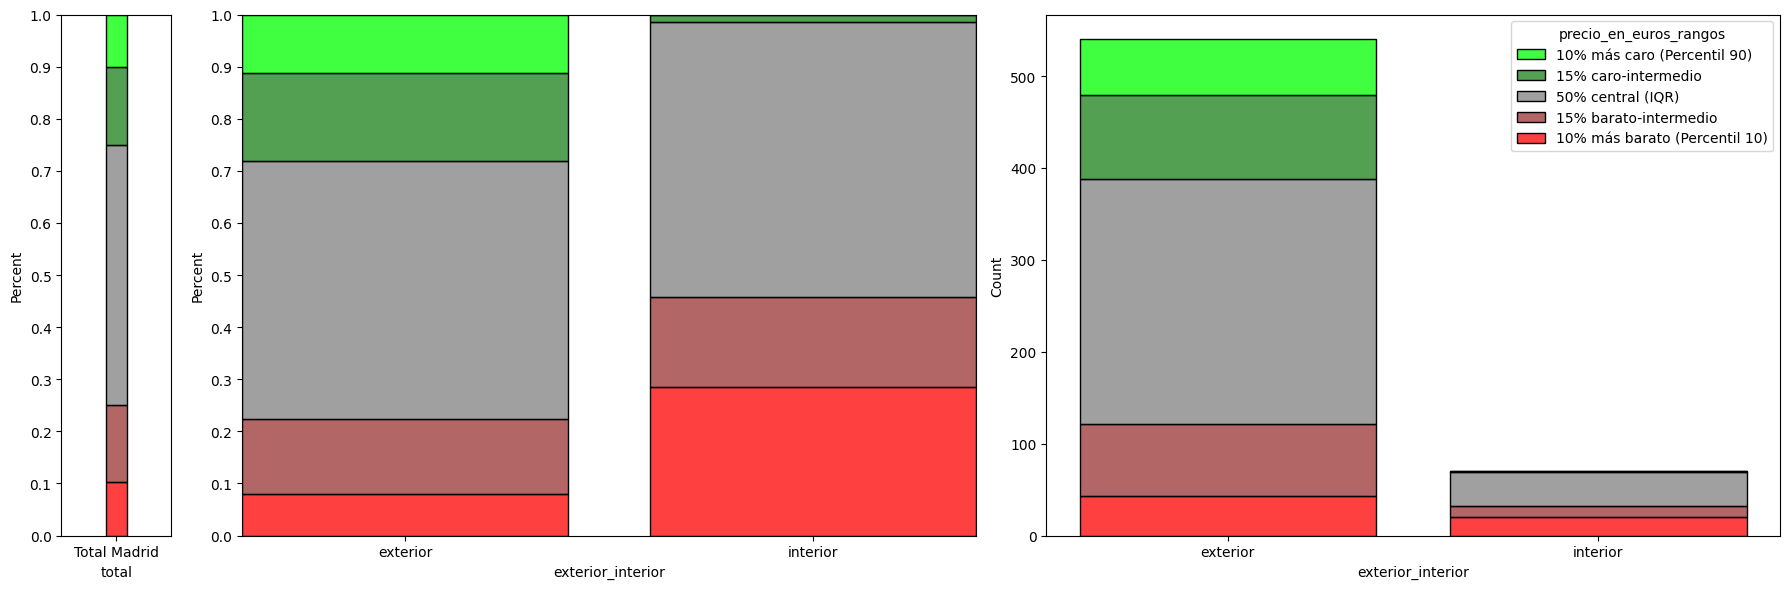

In [182]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df,ax=ax2, x="exterior_interior", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df,ax=ax3, x="exterior_interior", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

In [183]:
df_plot['nuevo_usado'].value_counts()

nuevo_usado
obra_usada       499
para_reformar     86
obra_nueva        25
Name: count, dtype: Int64

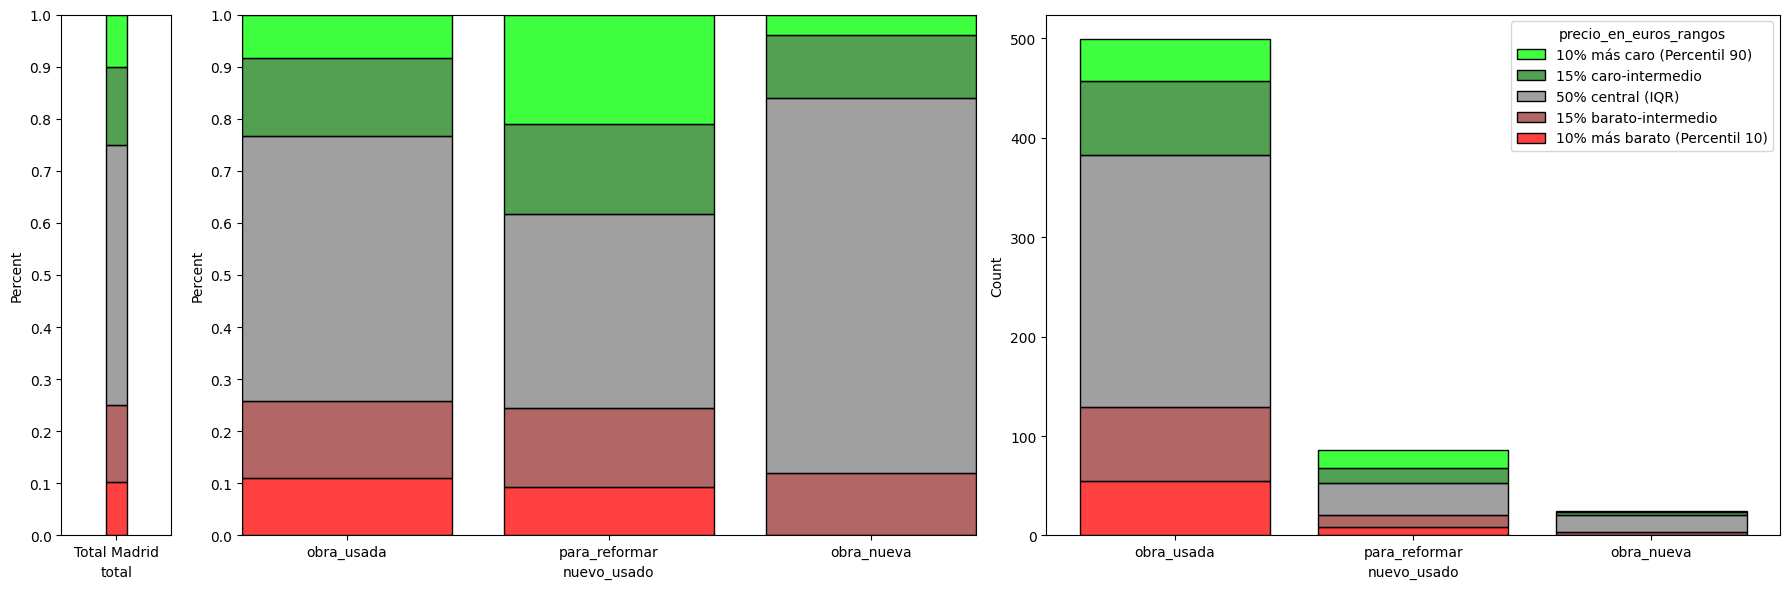

In [184]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="nuevo_usado", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="nuevo_usado", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

### * pee + `ESPACIO`

In [185]:
df_plot['metros_cuadrados_rangos_xl'].value_counts()

metros_cuadrados_rangos_xl
61-120     243
121-240    155
31-60       86
241-500     85
501<        32
0-30         9
Name: count, dtype: int64

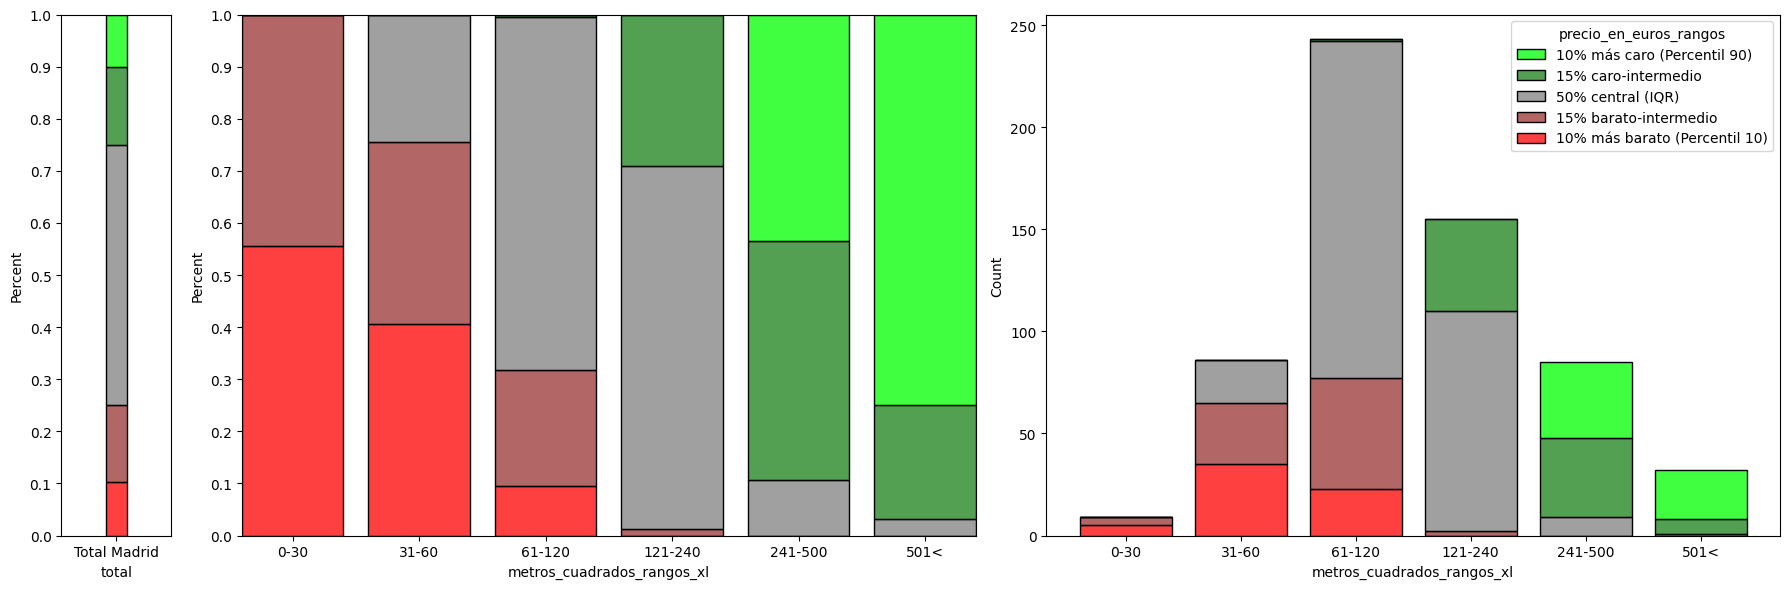

In [186]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="metros_cuadrados_rangos_xl", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="metros_cuadrados_rangos_xl", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

In [187]:
df_plot['metros_cuadrados_rangos_xl'].value_counts()

metros_cuadrados_rangos_xl
61-120     243
121-240    155
31-60       86
241-500     85
501<        32
0-30         9
Name: count, dtype: int64

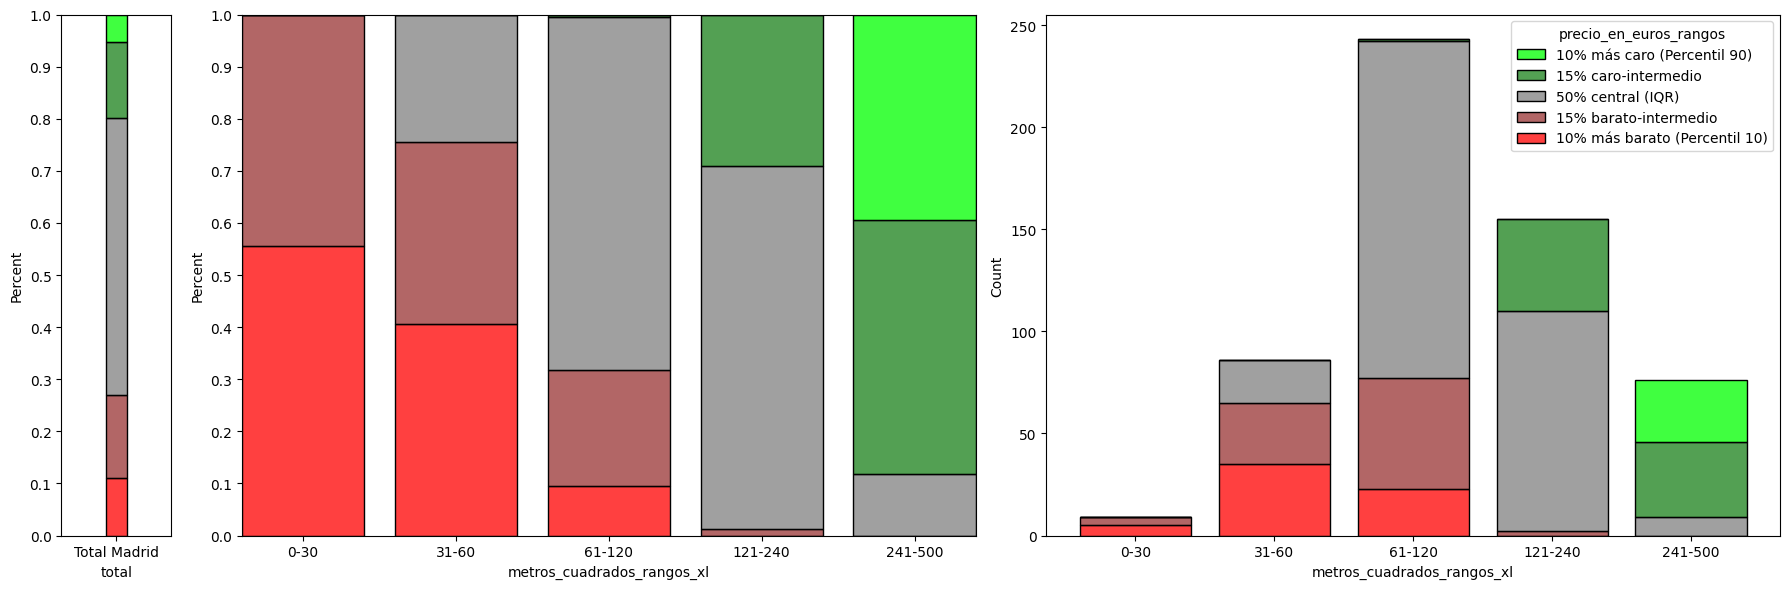

In [188]:
df_plot = df_sin_outliers_metros_cuadrados.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="metros_cuadrados_rangos_xl", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="metros_cuadrados_rangos_xl", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

## EQUIPAMIENTOS (y `pee`)

Solo para `pisos`. Excluimos Chalets para poder comparar entre viviendas `tipo_inmueble` similares.

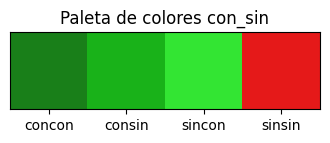

In [96]:
palette = list(con_sin_colors.values())
labels = list(con_sin_colors.keys())

sns.palplot(palette)
plt.xticks(range(len(labels)), labels)
plt.title('Paleta de colores con_sin');

In [189]:
df_pisos.groupby("ascensor")["precio_en_euros"].agg(['mean','median','std']).round(2)

,mean,median,std
ascensor,,,
con ascensor,1531871.28,965935.0,1596320.24
sin ascensor,323617.15,272000.0,194764.13


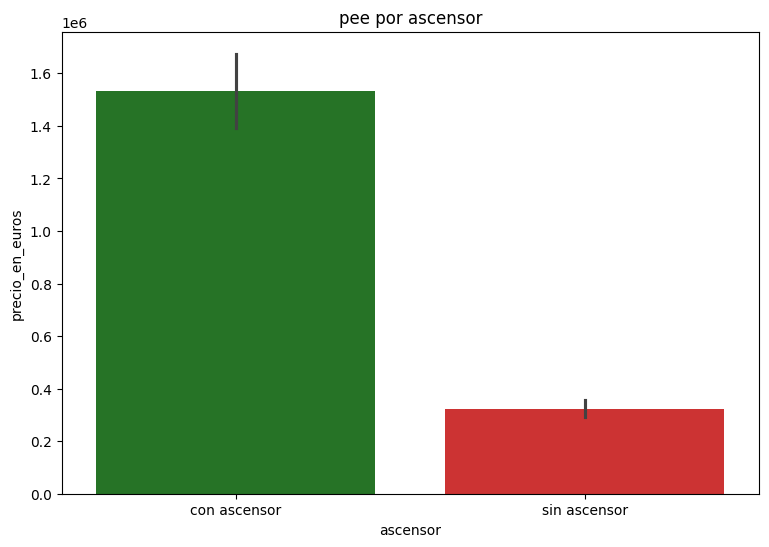

In [190]:
order = ascensor_orden
plt.figure(figsize=(9, 6)) 
plt.title("pee por ascensor")
sns.barplot(data=df_pisos, x="ascensor", y="precio_en_euros", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
plt.show()

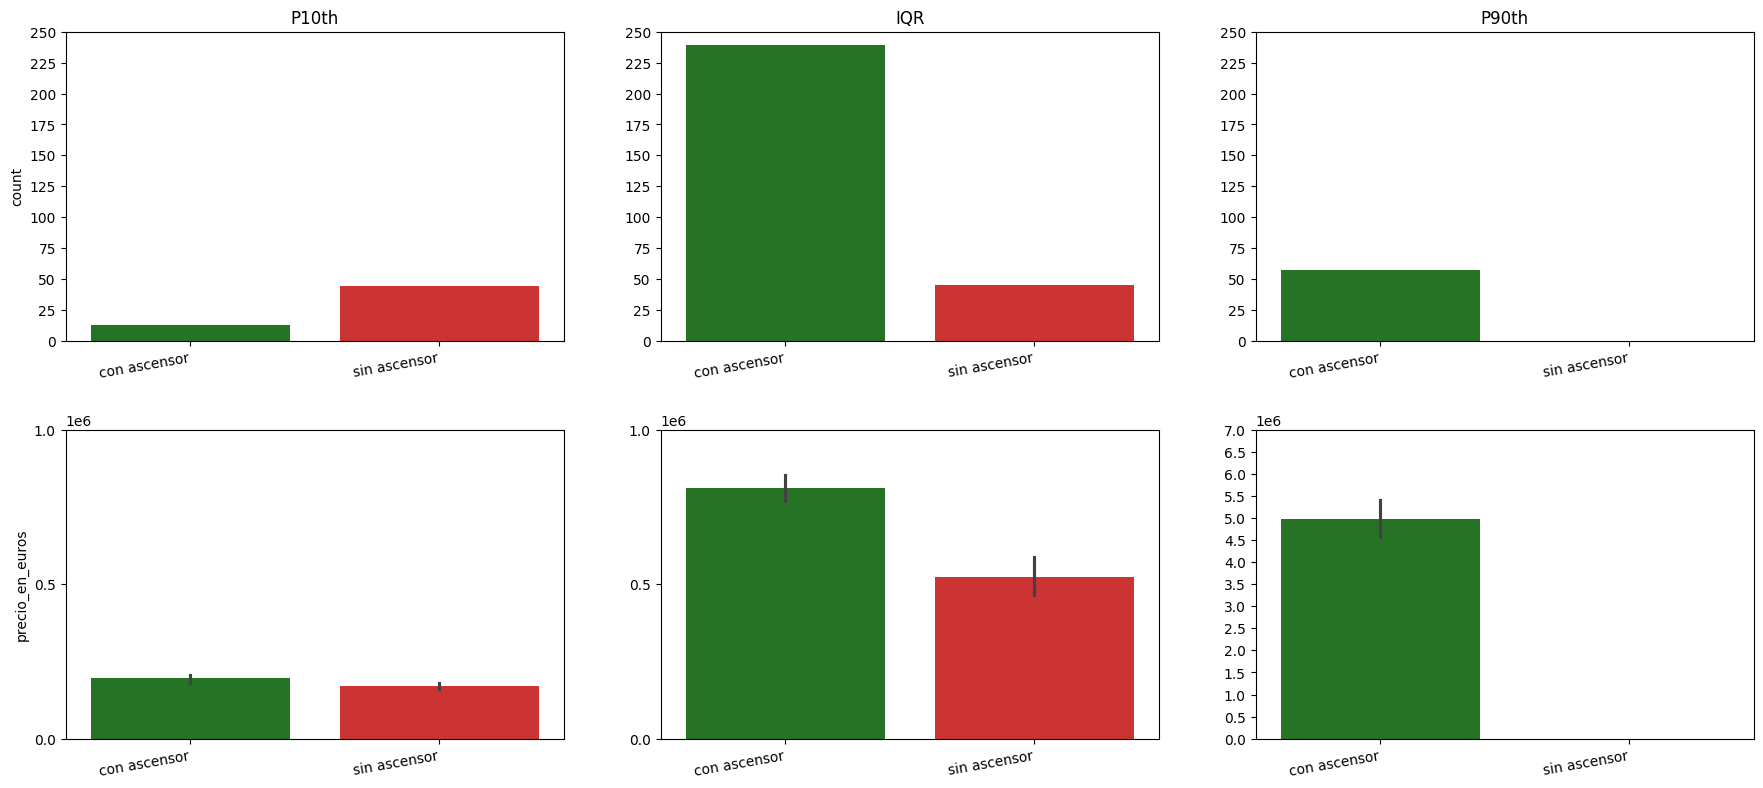

In [193]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="ascensor", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="ascensor", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="ascensor", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="ascensor", y="precio_en_euros", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="ascensor", y="precio_en_euros", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="ascensor", y="precio_en_euros", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right')
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_en_euros' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 250) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
axes[1, 0].set_ylim(0, 1000000)   
axes[1, 1].set_ylim(0, 1000000)    
axes[1, 2].set_ylim(0, 7000000)  
[ax.yaxis.set_major_locator(MultipleLocator(500000)) for ax in axes[1]]
plt.show()


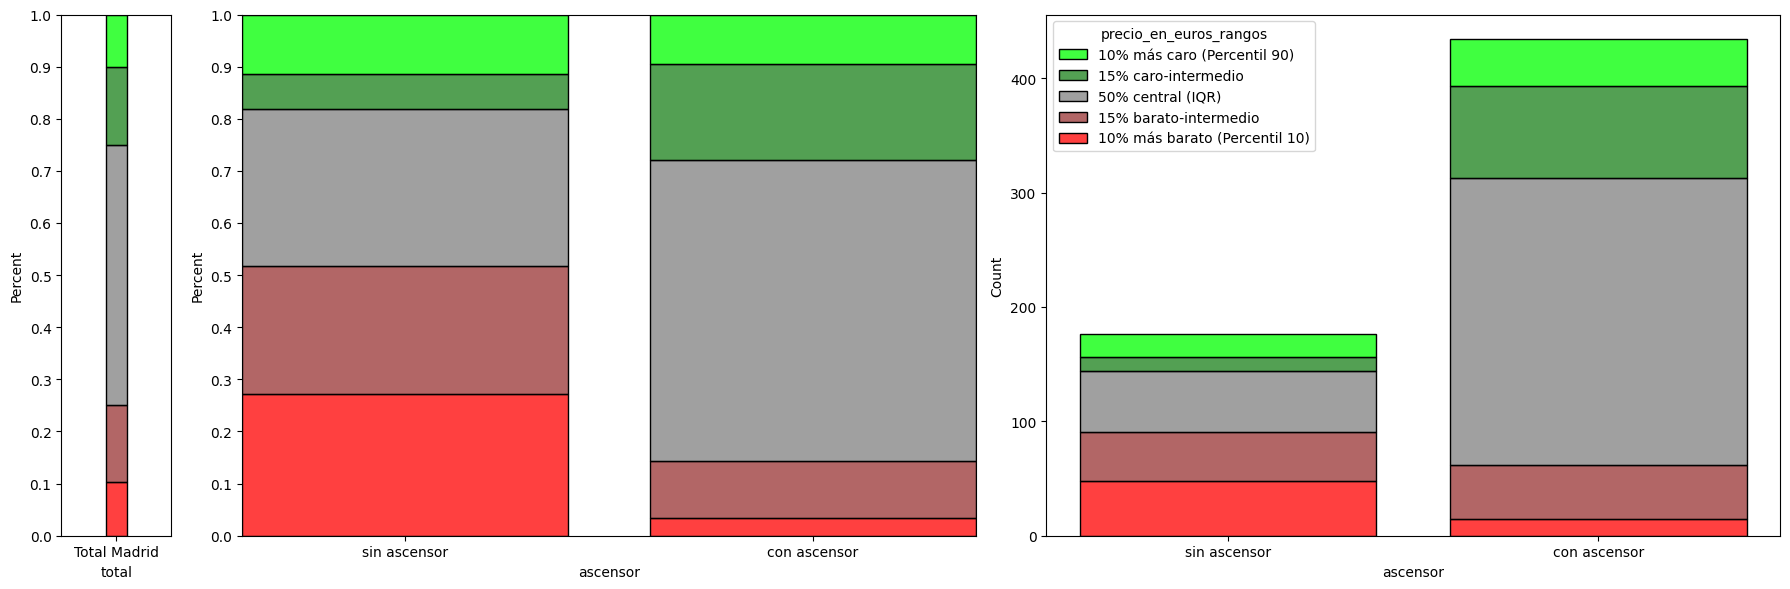

In [99]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="ascensor", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="ascensor", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

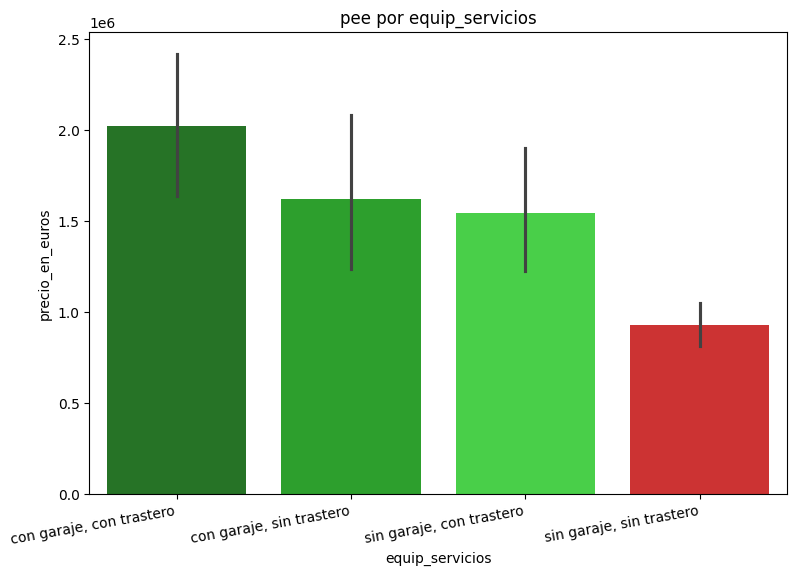

In [225]:
order = equip_servicios_orden
plt.figure(figsize=(9, 6)) 

plt.title("pee por equip_servicios")
sns.barplot(data=df_pisos, x="equip_servicios", y="precio_en_euros", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
plt.xticks(rotation=10, ha='right')
plt.show()

In [197]:
df_pisos.groupby("equip_servicios")["precio_en_euros"].agg(['mean','median','std']).round(2)

,mean,median,std
equip_servicios,,,
"con garaje, con trastero",2021813.08,1335000.0,2015578.46
"con garaje, sin trastero",1617650.92,935000.0,1622174.62
"sin garaje, con trastero",1542023.08,1087500.0,1702589.41
"sin garaje, sin trastero",925127.43,530000.0,1116441.12


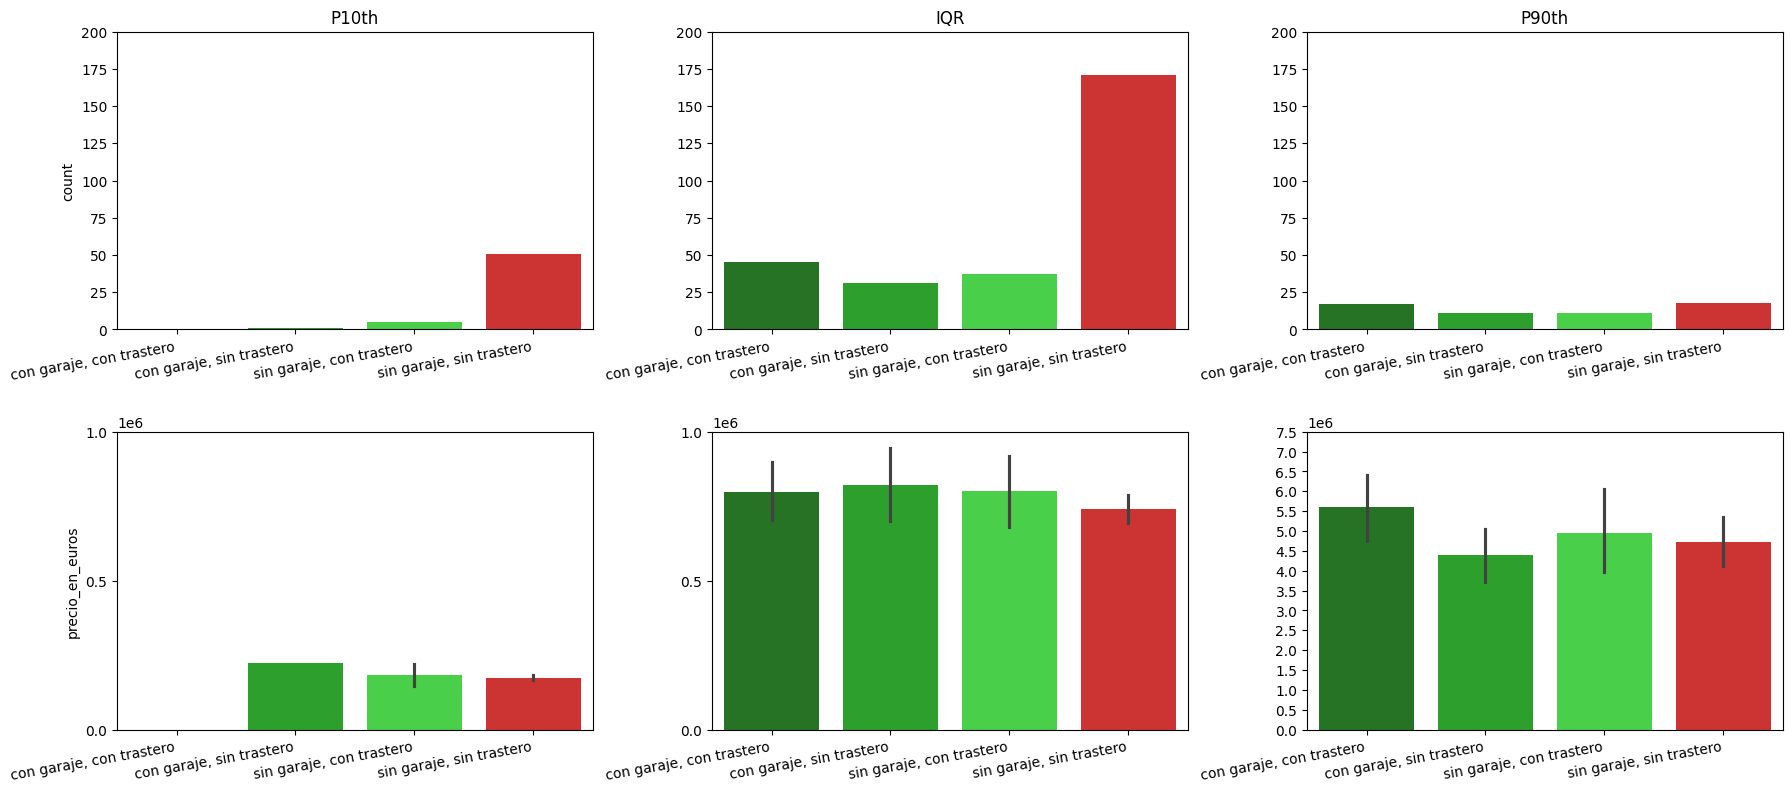

In [202]:
order = equip_servicios_orden
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_servicios", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_servicios", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_servicios", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_servicios", y="precio_en_euros", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_servicios", y="precio_en_euros", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_servicios", y="precio_en_euros", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_en_euros' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 200) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
axes[1, 0].set_ylim(0, 1000000)   
axes[1, 1].set_ylim(0, 1000000)    
axes[1, 2].set_ylim(0, 7500000)  
[ax.yaxis.set_major_locator(MultipleLocator(500000)) for ax in axes[1]]
plt.show()

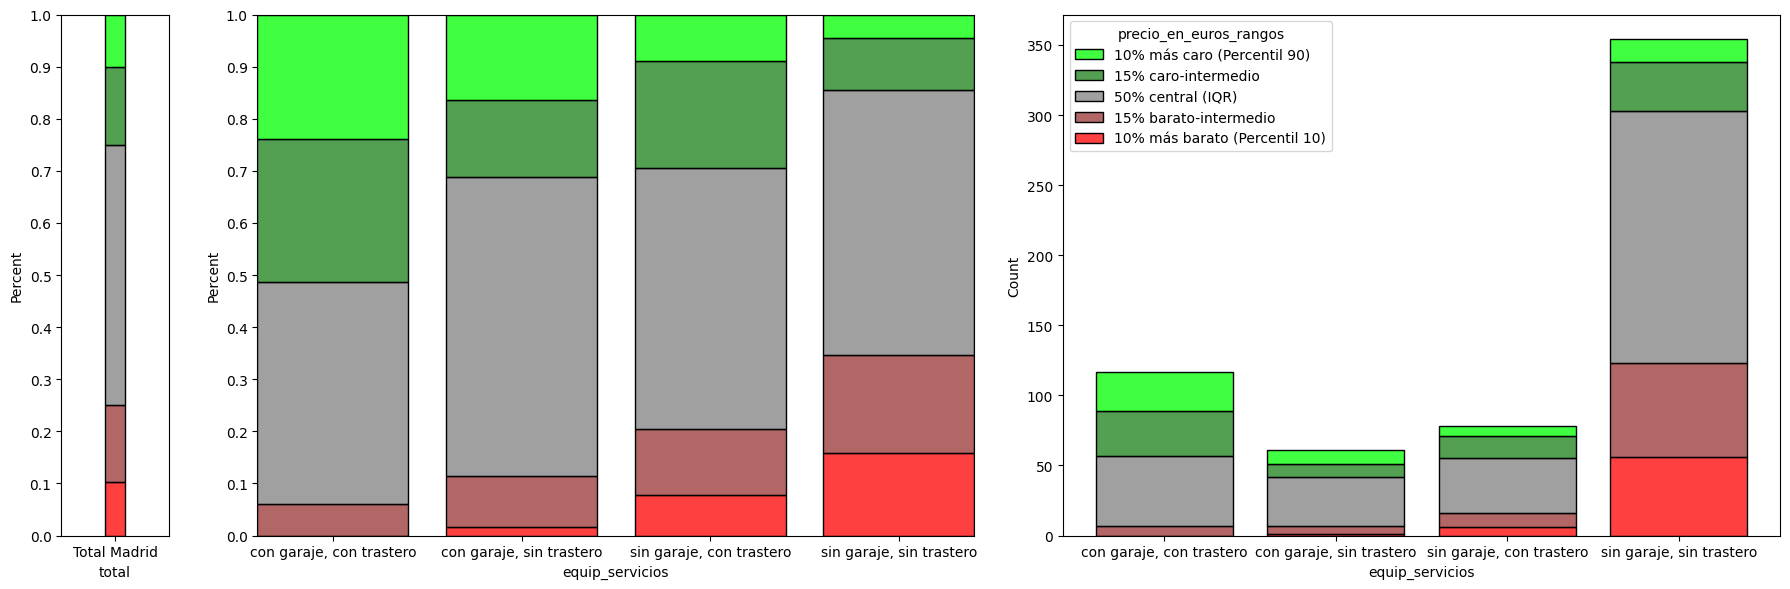

In [101]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_servicios"] = pd.Categorical(
    df_plot["equip_servicios"],
    categories=equip_servicios_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="equip_servicios", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_servicios", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

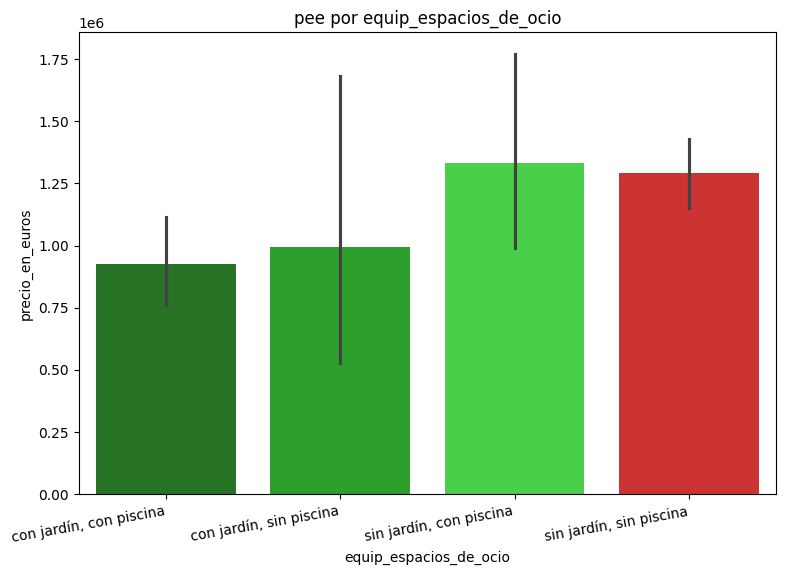

In [226]:
order = equip_espacios_de_ocio_orden
plt.figure(figsize=(9, 6)) 
plt.title("pee por equip_espacios_de_ocio")
sns.barplot(data=df_pisos, x="equip_espacios_de_ocio", y="precio_en_euros", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
plt.xticks(rotation=10, ha='right')
plt.show()

In [205]:
df_pisos.groupby("equip_servicios")["precio_en_euros"].agg(['mean','median','std']).round(2)


,mean,median,std
equip_servicios,,,
"con garaje, con trastero",2021813.08,1335000.0,2015578.46
"con garaje, sin trastero",1617650.92,935000.0,1622174.62
"sin garaje, con trastero",1542023.08,1087500.0,1702589.41
"sin garaje, sin trastero",925127.43,530000.0,1116441.12


[None, None, None]

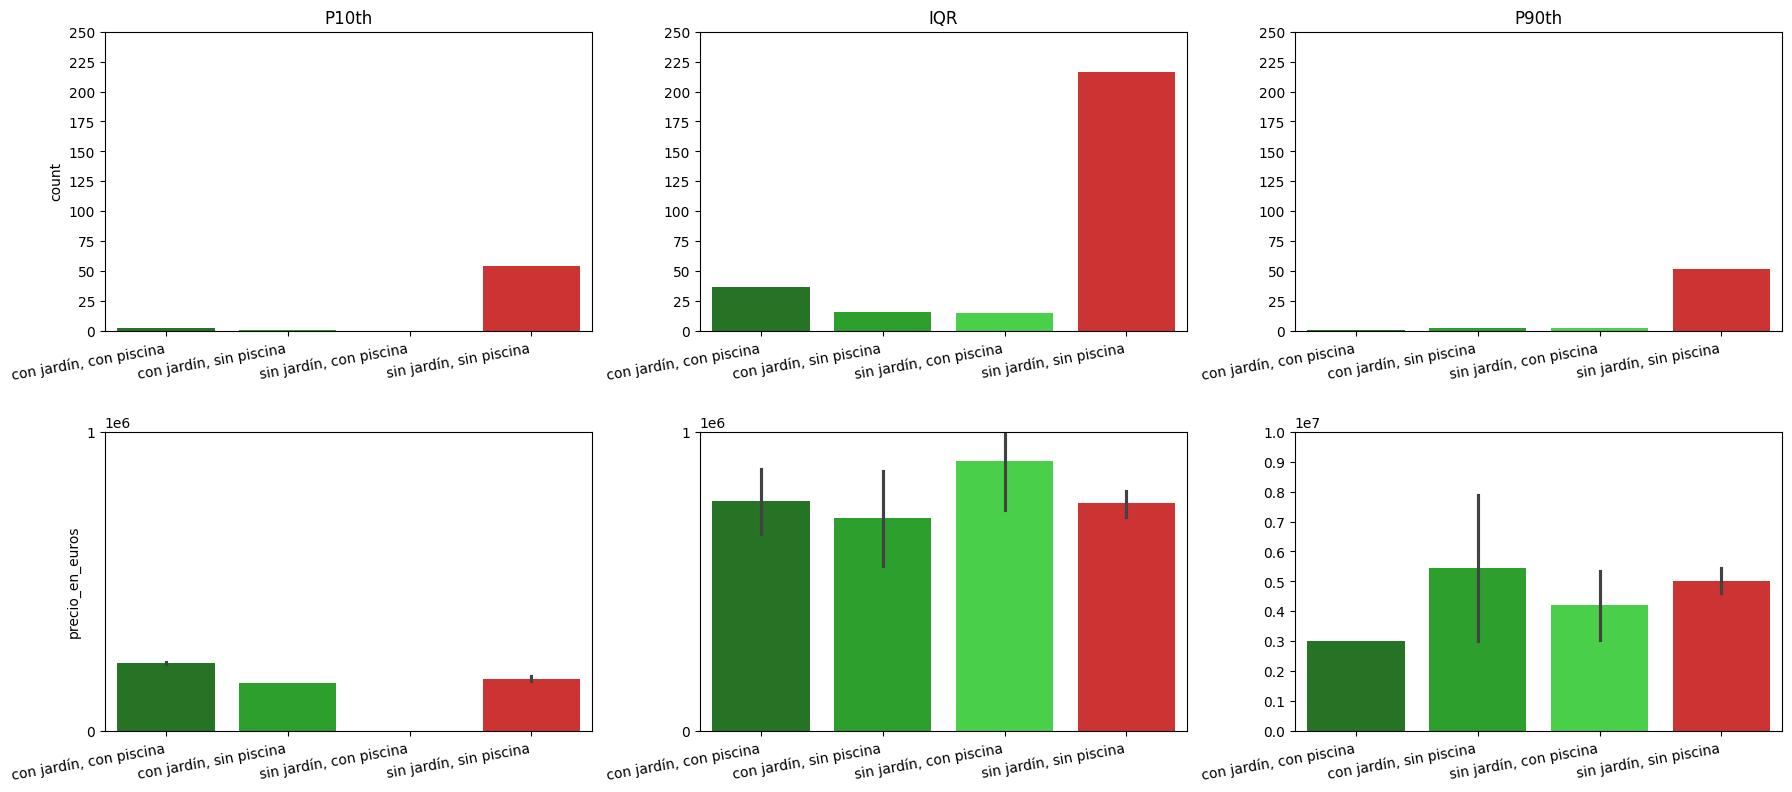

In [206]:
order = equip_espacios_de_ocio_orden

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_espacios_de_ocio", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_espacios_de_ocio", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_espacios_de_ocio", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_espacios_de_ocio", y="precio_en_euros", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_espacios_de_ocio", y="precio_en_euros", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_espacios_de_ocio", y="precio_en_euros", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_servicios_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_en_euros' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 250) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
axes[1, 0].set_ylim(0, 1000000)   
axes[1, 1].set_ylim(0, 1000000)    
axes[1, 2].set_ylim(0, 10000000)  
[ax.yaxis.set_major_locator(MultipleLocator(1000000)) for ax in axes[1]]

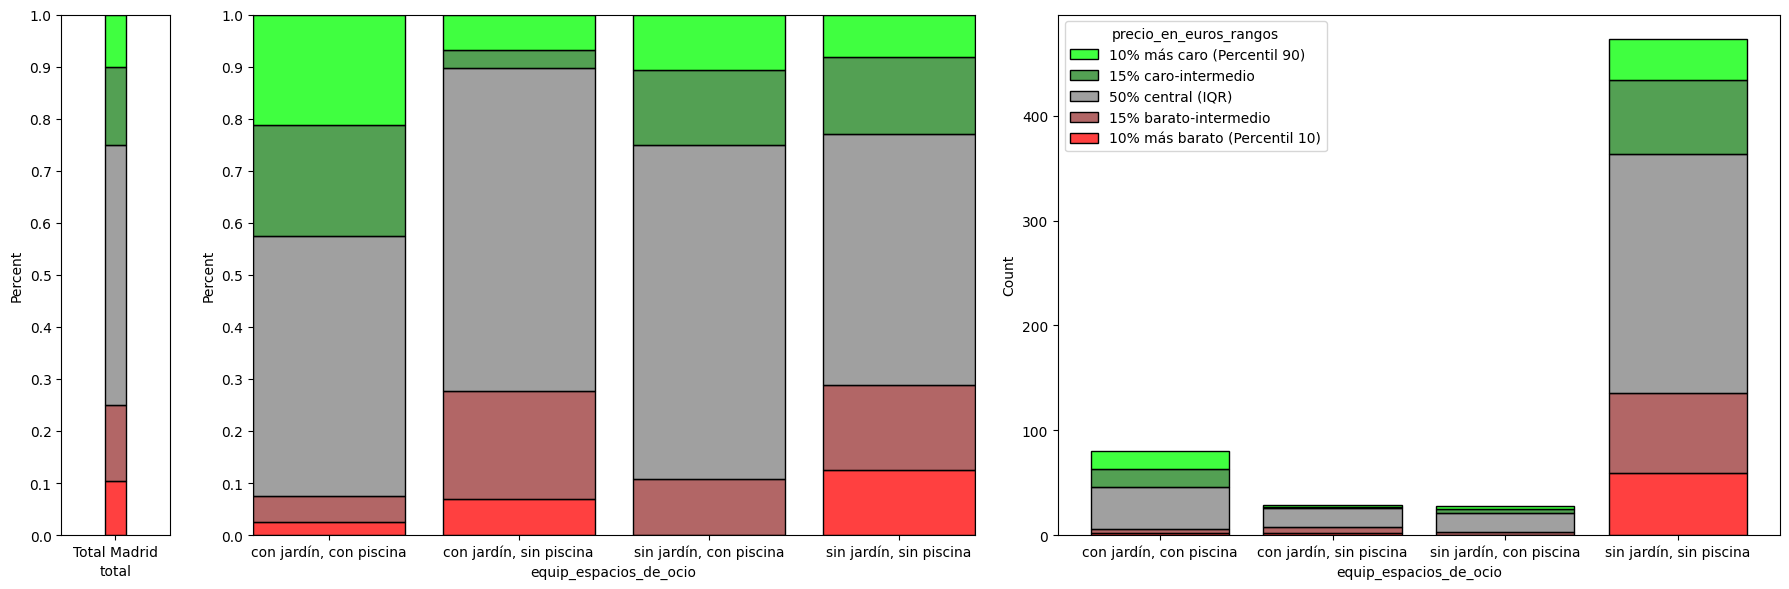

In [103]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_espacios_de_ocio"] = pd.Categorical(
    df_plot["equip_espacios_de_ocio"],
    categories=equip_espacios_de_ocio_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="equip_espacios_de_ocio", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_espacios_de_ocio", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

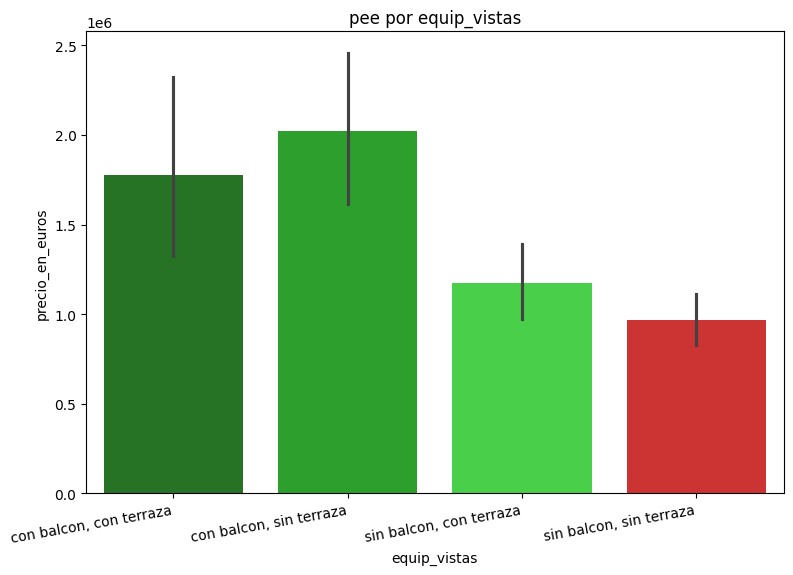

In [227]:
order = equip_vistas_orden
plt.figure(figsize=(9, 6)) 
plt.title("pee por equip_vistas")
sns.barplot(data=df_pisos, x="equip_vistas", y="precio_en_euros", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
plt.xticks(rotation=10, ha='right')
plt.show()

In [209]:
df_pisos.groupby("equip_vistas")["precio_en_euros"].agg(['mean','median','std']).round(2)

,mean,median,std
equip_vistas,,,
"con balcon, con terraza",1777748.75,1195000.0,1685266.97
"con balcon, sin terraza",2021413.02,1174500.0,2024273.22
"sin balcon, con terraza",1174123.08,755000.0,1282036.45
"sin balcon, sin terraza",968915.57,502499.5,1244720.40


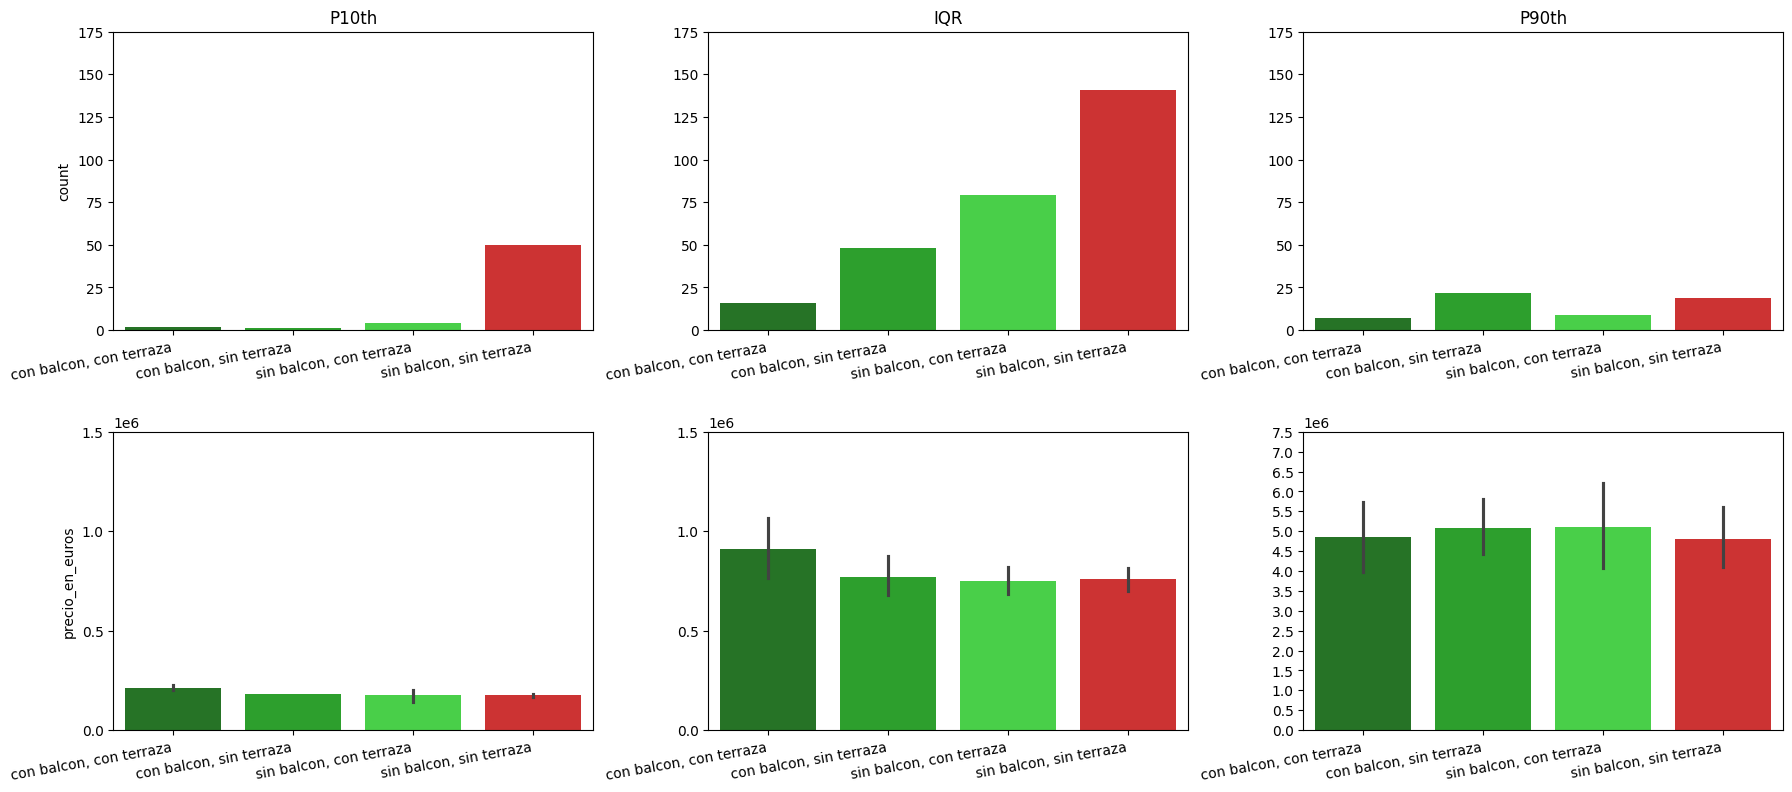

In [213]:
order = equip_vistas_orden
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_vistas", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_vistas", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_vistas", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_vistas", y="precio_en_euros", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_vistas", y="precio_en_euros", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_vistas", y="precio_en_euros", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_en_euros' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 175) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
axes[1, 0].set_ylim(0, 1500000)   
axes[1, 1].set_ylim(0, 1500000)    
axes[1, 2].set_ylim(0, 7500000)  
[ax.yaxis.set_major_locator(MultipleLocator(500000)) for ax in axes[1]];

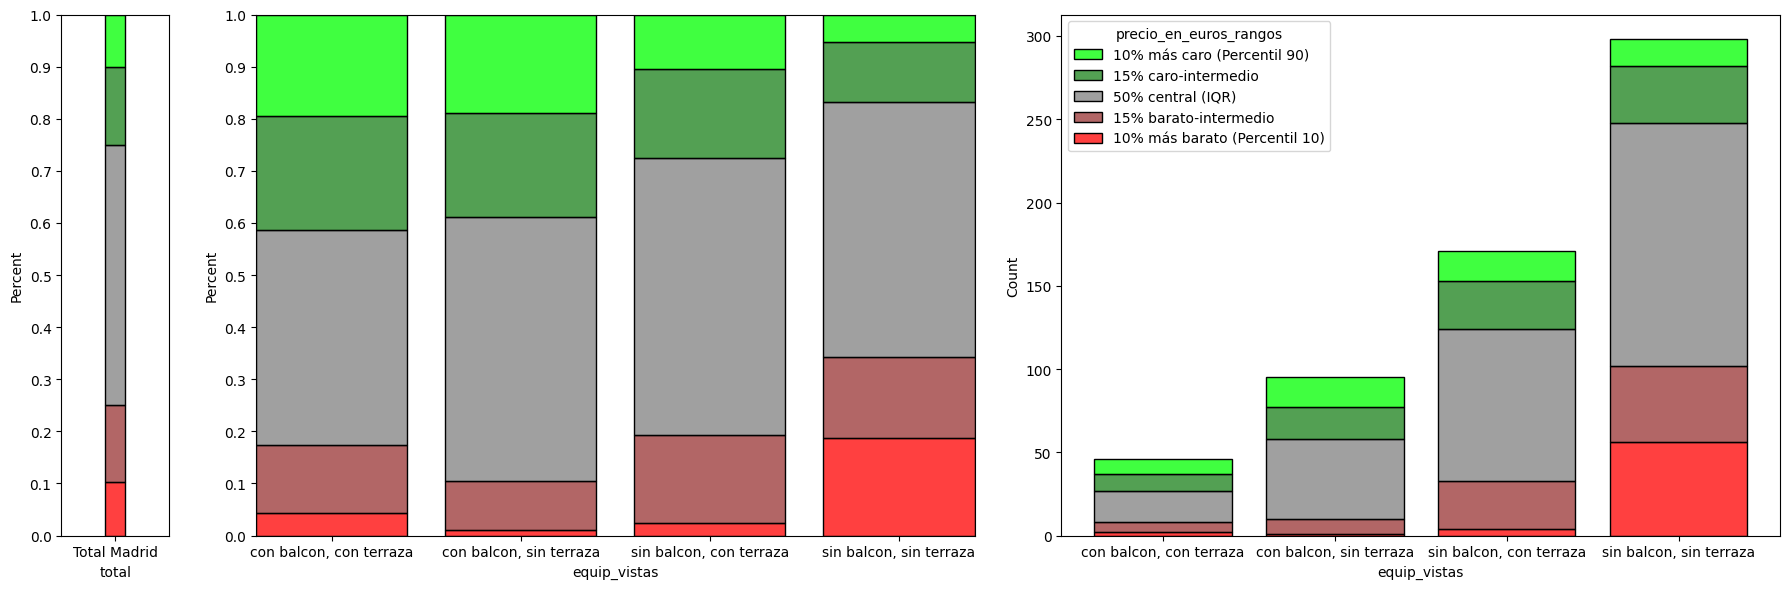

In [105]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_vistas"] = pd.Categorical(
    df_plot["equip_vistas"],
    categories=equip_vistas_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="equip_vistas", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_vistas", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

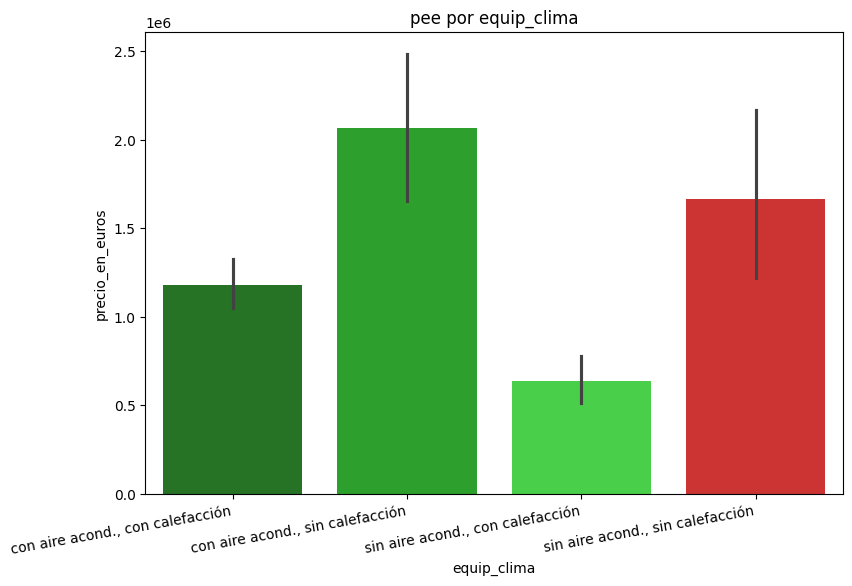

In [232]:
order = equip_clima_orden
plt.figure(figsize=(9, 6)) 
plt.title("pee por equip_clima")
sns.barplot(data=df_pisos, x="equip_clima", y="precio_en_euros", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
plt.xticks(rotation=10, ha='right')
plt.show()

In [215]:
df_pisos.groupby("equip_clima")["precio_en_euros"].agg(['mean','median','std']).round(2)

,mean,median,std
equip_clima,,,
"con aire acond., con calefacción",1179034.46,849000.0,1219032.71
"con aire acond., sin calefacción",2068205.71,1342500.0,2039849.41
"sin aire acond., con calefacción",639014.74,413500.0,753361.77
"sin aire acond., sin calefacción",1663932.31,639000.0,2112468.33


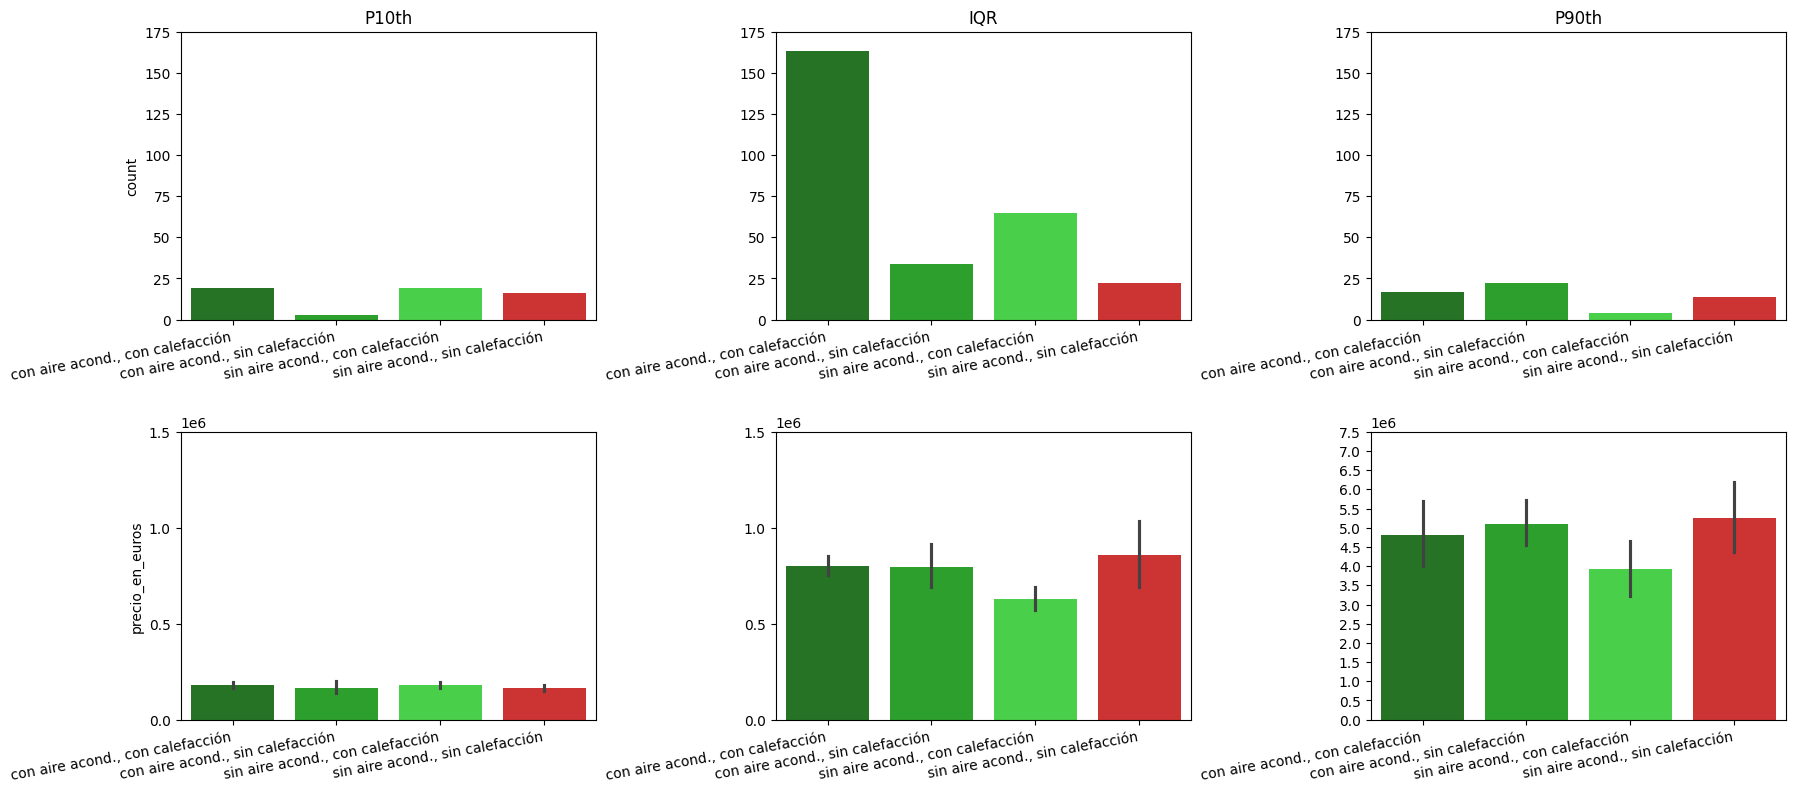

In [219]:
order = equip_clima_orden
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_clima", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_clima", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_clima", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_clima", y="precio_en_euros", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_clima", y="precio_en_euros", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_clima", y="precio_en_euros", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_en_euros' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 175) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
axes[1, 0].set_ylim(0, 1500000)   
axes[1, 1].set_ylim(0, 1500000)    
axes[1, 2].set_ylim(0, 7500000)  
[ax.yaxis.set_major_locator(MultipleLocator(500000)) for ax in axes[1]];

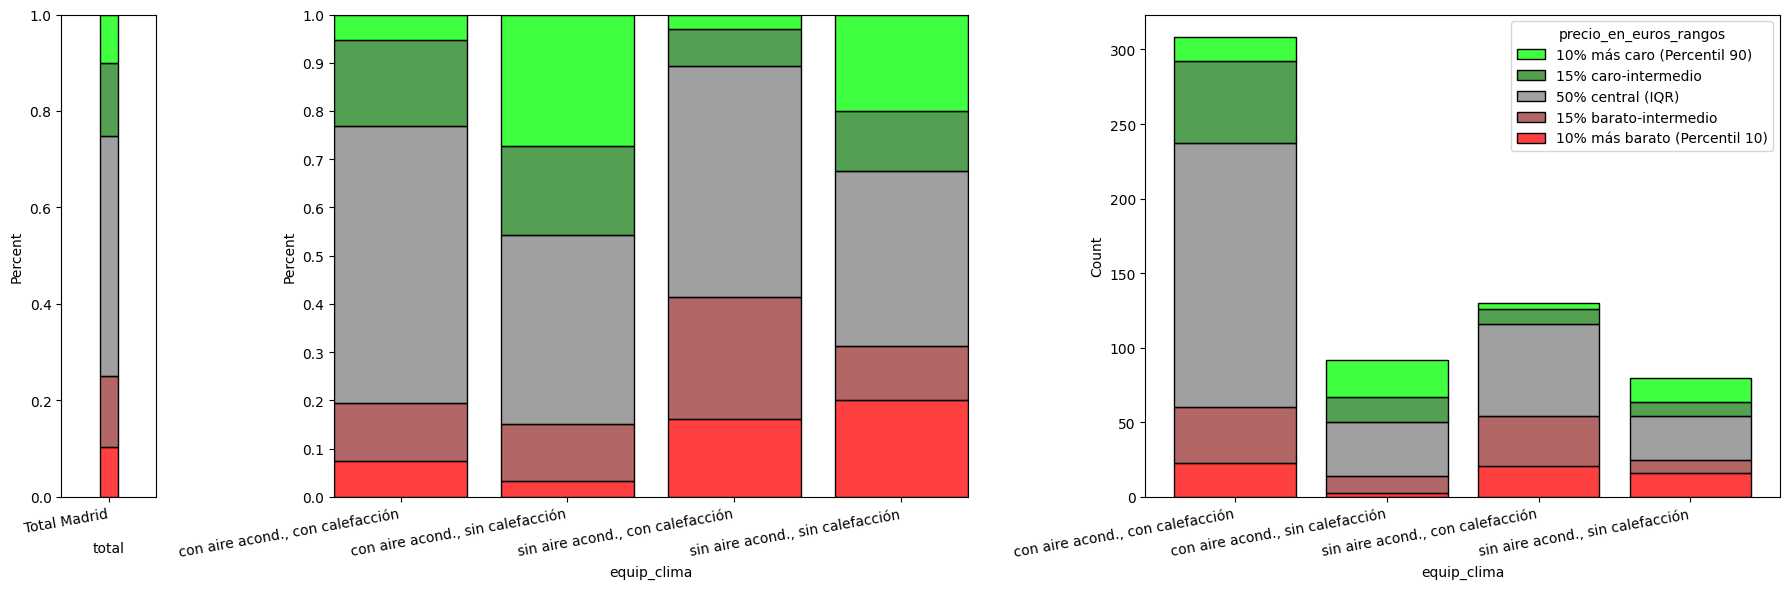

In [ ]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_clima"] = pd.Categorical(
    df_plot["equip_clima"],
    categories=equip_clima_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1,legend=False, shrink=0.3, )
sns.histplot(data=df_plot,ax=ax2, x="equip_clima", legend=False, shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="fill", stat='percent', palette=precio_en_euros_rangos_colors, bins=1)
sns.histplot(data=df_plot,ax=ax3, x="equip_clima", shrink=0.8, hue="precio_en_euros_rangos", hue_order=precio_en_euros_rangos_orden, multiple="stack", stat='count', palette=precio_en_euros_rangos_colors, bins=1)

ax1.set_xlim(-0.8, 0.8)
ax2.set_yticks(np.arange(0, 1.01, 0.1))

for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='x', labelrotation=10)
    plt.setp(ax.get_xticklabels(), ha='right')

plt.tight_layout()